## Módulo B

### Imports

In [93]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from skfeature.function.similarity_based import fisher_score
from ReliefF import ReliefF

## 1.1. Data Splitting

### 1.1.1. Train-Test (TT) e Train-Validation-Test data split

In [94]:
def train_test(data,target,train_size):
    x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=train_size)
    trainTest = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]}
    return trainTest

def train_validation_test(data, target, train_size, test_size):

    x_train, x_rem, y_train, y_rem = train_test_split(data, target, train_size=train_size)

    test = test_size / (1-train_size)

    x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size = test)

    trainValidation = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test], "VALIDATION": [x_valid, y_valid]}
    
    return trainValidation





### 1.1.2. K-fold data split

In [95]:
from sklearn.model_selection import KFold

def K_fold(x, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle = True)
    k_fold = []
    for train_index, test_index in kf.split(x):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        k_fold.append({"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]})
    
    return k_fold

### Testes para as funções de data splitting

In [96]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])

print("Train Test\n")
trainTest = train_test(X, y, 0.70)
display(trainTest)

print("\nTrain Validation Test\n")
trainValidation = train_validation_test(X, y, 0.4, 0.3)
display(trainValidation)

print("\nK-Fold\n")
k_Fold = K_fold(X, y, 4)
display(k_Fold)

Train Test


{'TRAIN': [array([[1, 2],
         [3, 4]]),
  array([3, 2])],
 'TEST': [array([[3, 4],
         [1, 2]]),
  array([4, 1])]}


Train Validation Test


{'TRAIN': [array([[3, 4]]), array([2])],
 'TEST': [array([[1, 2],
         [1, 2]]), array([1, 3])],
 'VALIDATION': [array([[3, 4]]), array([4])]}


K-Fold


[{'TRAIN': [array([[1, 2],
          [3, 4],
          [3, 4]]),
   array([1, 2, 4])],
  'TEST': [array([[1, 2]]), array([3])]},
 {'TRAIN': [array([[1, 2],
          [1, 2],
          [3, 4]]),
   array([1, 3, 4])],
  'TEST': [array([[3, 4]]), array([2])]},
 {'TRAIN': [array([[1, 2],
          [3, 4],
          [1, 2]]),
   array([1, 2, 3])],
  'TEST': [array([[3, 4]]), array([4])]},
 {'TRAIN': [array([[3, 4],
          [1, 2],
          [3, 4]]),
   array([2, 3, 4])],
  'TEST': [array([[1, 2]]), array([1])]}]

## 1.2. Métricas de exatidação

In [97]:

true = [2, 0, 2, 2, 0, 1]
predict = [1, 0, 2, 2, 1, 1]

Metrics
Recall     0.666667
Precision  0.888889
F1-score   0.705556

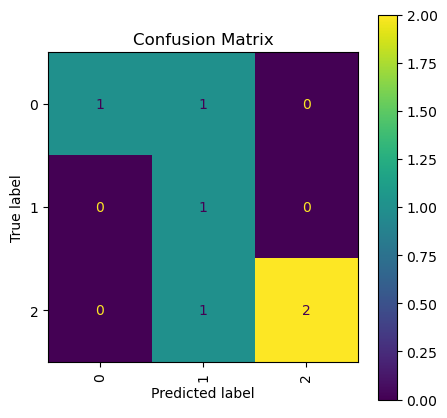

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def metrics(true, predict):

    cm = confusion_matrix(true, predict)
    rs = recall_score(true, predict, average='weighted', zero_division=0)
    ps = precision_score(true, predict, average='weighted', zero_division=0)
    f1 = f1_score(true, predict, average='weighted', zero_division=0)

    return [cm, rs, ps, f1]

def display_matrix(cm, rs, ps, f1, labels):

    metricsFrame = pd.DataFrame([rs, ps, f1], columns=['Metrics']).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1-score'})
    display(metricsFrame)

    try:
        cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
        _, ax = plt.subplots(figsize=(5,5))
        cmp.plot(ax=ax)
        ax.set_title("Confusion Matrix")
        ax.xaxis.set_ticklabels(labels, rotation=90)
        ax.yaxis.set_ticklabels(labels)
        plt.show()

    except:
        cmFrame = pd.DataFrame(cm).style.set_caption("Confusion Matrix")
        display(cmFrame)

cm, rs, ps, f1 = metrics(true, predict)
display_matrix(cm, rs, ps, f1, [0,1,2])





### 2.1. Dataset

In [99]:
iris = datasets.load_iris()

data = iris.data
target = iris.target

display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 2.1. k-Nearest Neighbours

In [100]:
def K_neighbors_classifier(x, y, k):
    neighbor = KNeighborsClassifier(n_neighbors=k)
    neighbor.fit(x, y)

    return neighbor

### 2.1.1. Train-only

Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

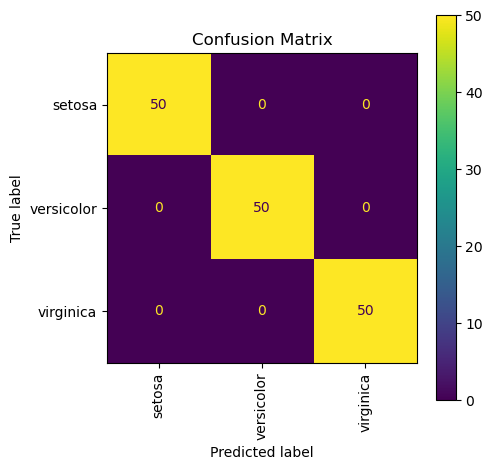

In [101]:
def TO_211(x, y, labels, k):
    neigh = K_neighbors_classifier(x, y, k)
    pred = neigh.predict(x)
    true = y
    cm, rs, ps, f1 = metrics(true, pred)
    
    display_matrix(cm, rs, ps, f1, labels)

TO_211(data, target, iris["target_names"], 1)

### 2.1.1. TT 70-30

Metrics
Recall     0.977778
Precision  0.979365
F1-score   0.977745

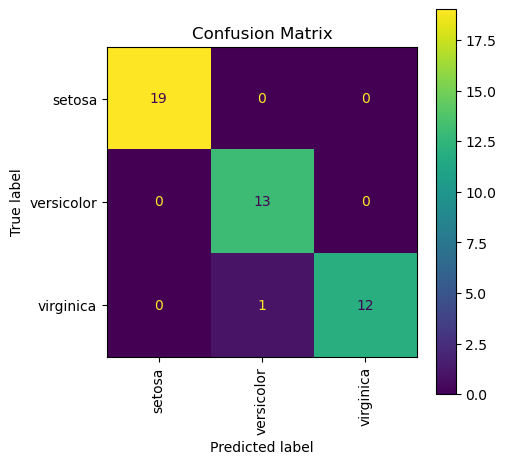

In [102]:
def TT70_30_211(x, y, labels, k):
    trainTest = train_test(x, y, 0.7)
    neigh = K_neighbors_classifier(trainTest['TRAIN'][0], trainTest['TRAIN'][1], k)
    pred = neigh.predict(trainTest['TEST'][0])
    true = trainTest['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)
    
    display_matrix(cm, rs, ps, f1, labels)

TT70_30_211(data, target, iris["target_names"], 1)

### 2.1.1. 10x10-fold cross-validation (10CV)

Iteração 0


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

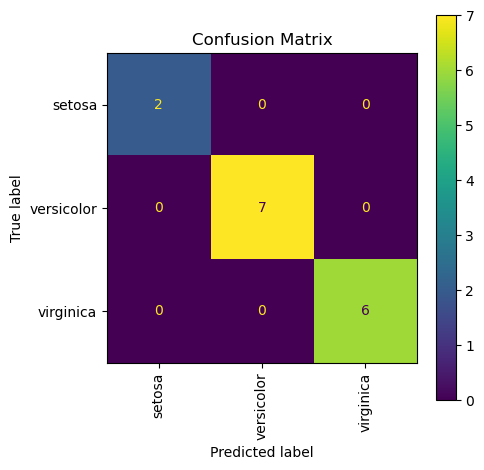

Iteração 1


Metrics
Recall     0.933333
Precision  0.946667
F1-score   0.932275

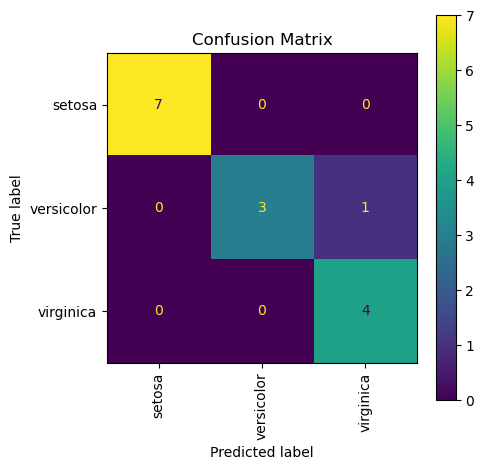

Iteração 2


Metrics
Recall     0.933333
Precision  0.946667
F1-score   0.934007

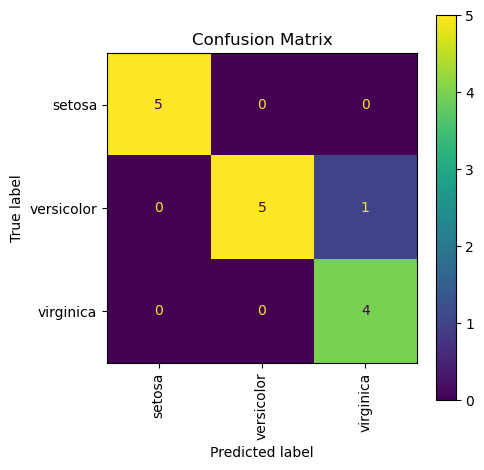

Iteração 3


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

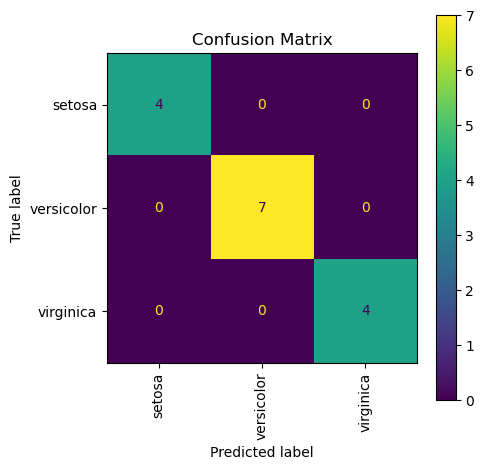

Iteração 4


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

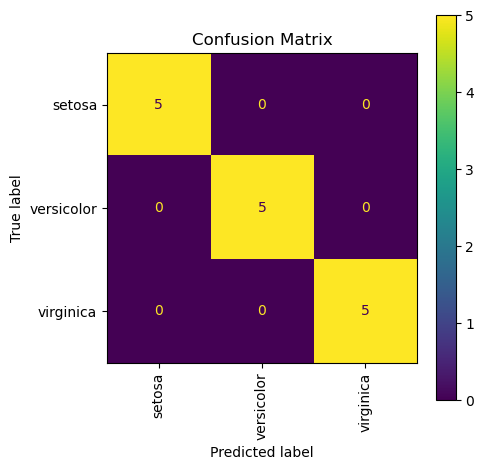

Iteração 5


Metrics
Recall     0.933333
Precision  0.950000
F1-score   0.934392

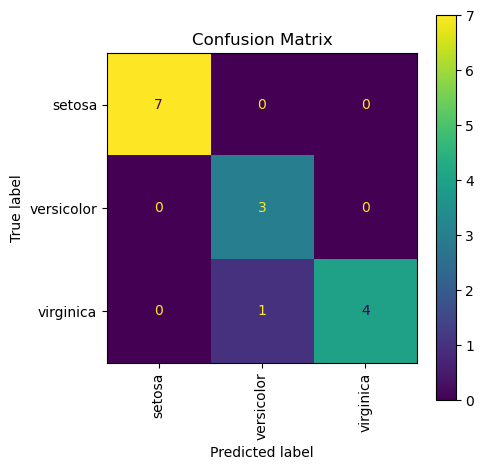

Iteração 6


Metrics
Recall     0.933333
Precision  0.942857
F1-score   0.933333

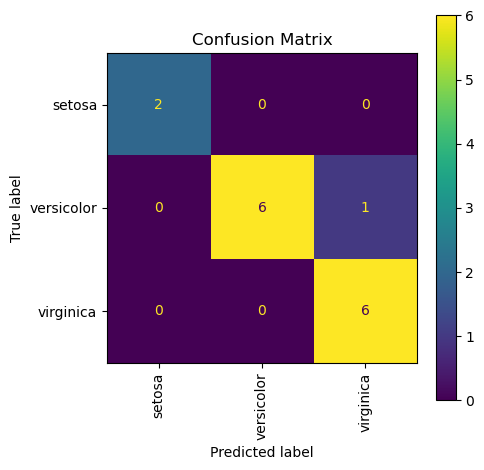

Iteração 7


Metrics
Recall     0.933333
Precision  0.955556
F1-score   0.936296

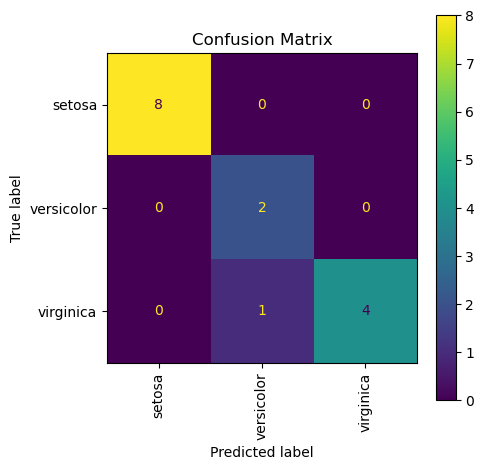

Iteração 8


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

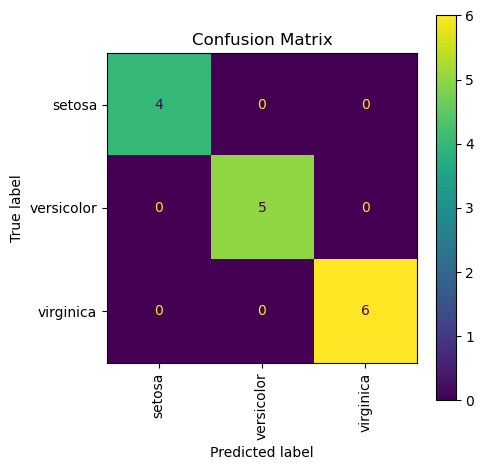

Iteração 9


Metrics
Recall     0.933333
Precision  0.946667
F1-score   0.933333

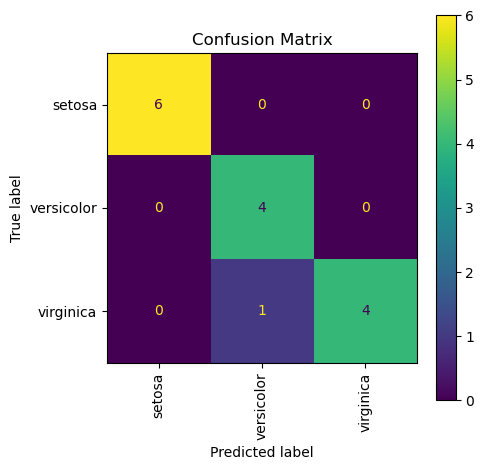

In [103]:
def CV_211(x, y, n_splits, labels, k):
    kf = K_fold(x, y, n_splits)

    count = 0
    for info in kf:
        print("Iteração " + str(count))

        neigh = K_neighbors_classifier(info['TRAIN'][0], info['TRAIN'][1], k)
        pred = neigh.predict(info['TEST'][0])
        true = info['TEST'][1]

        cm, rs, ps, f1 = metrics(true, pred)

        display_matrix(cm, rs, ps, f1, labels)

        count += 1

CV_211(data, target, 10, iris["target_names"], 1)

### 2.1.2. k na gama {1, 3, 5, ...,15}

In [104]:
k_array = np.arange(1, 16, 2)

display(k_array)

array([ 1,  3,  5,  7,  9, 11, 13, 15])

### 2.1.2. Train-only

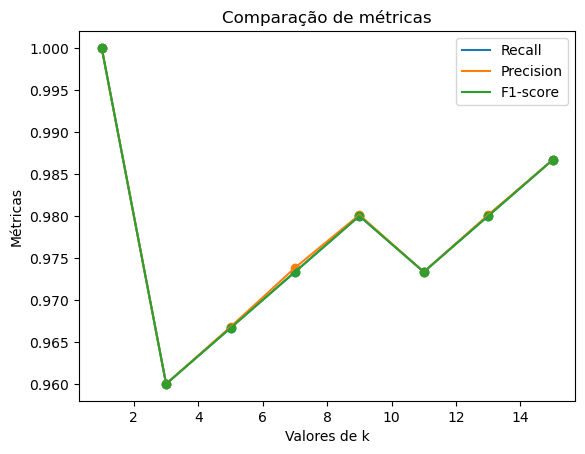

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

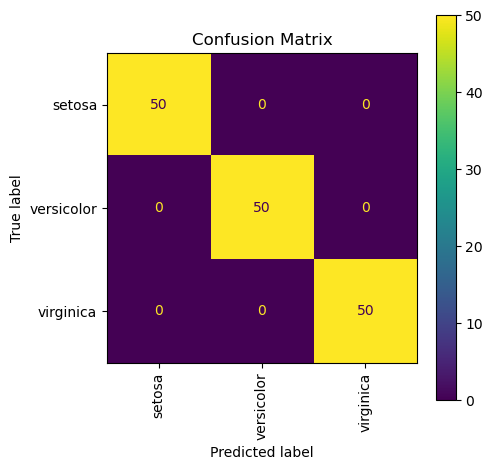

In [105]:
def TO_212(x, y, metr):
    for k in k_array:
        neigh = K_neighbors_classifier(x, y, k)
        pred = neigh.predict(x)
        true = y
        cm, rs, ps, f1 = metrics(true, pred)

        metr["Neigh"].append(neigh)
        metr["Recall"].append(rs)
        metr["Precision"].append(ps)
        metr["F1-score"].append(f1)

    return metr

def plot_metrics(metr):
    plt.figure()

    plt.plot(k_array, metr["Recall"], label="Recall")
    plt.scatter(k_array, metr["Recall"])
    plt.plot(k_array, metr["Precision"], label="Precision")
    plt.scatter(k_array, metr["Precision"])
    plt.plot(k_array, metr["F1-score"], label="F1-score")
    plt.scatter(k_array, metr["F1-score"])
    
    
    plt.title("Comparação de métricas")
    plt.xlabel("Valores de k")
    plt.ylabel("Métricas")
    plt.legend()
    plt.show()

def TO_gama(x, y, labels):
    metr = {"Neigh": [], "Recall": [], "Precision": [], "F1-score": []}
    
    new_metr = TO_212(x, y, metr)

    plot_metrics(new_metr)

    pos_k = new_metr["F1-score"].index(max(new_metr["F1-score"]))
    best_k = k_array[pos_k]
    print("Melhor K: " + str(best_k))

    neigh = K_neighbors_classifier(x, y, best_k)
    pred = neigh.predict(x)
    true = y
    cm, rs, ps, f1 = metrics(true, pred)

    display_matrix(cm, rs, ps, f1, labels)

TO_gama(data, target, iris["target_names"])


### 2.1.2. TVT 40-30-30

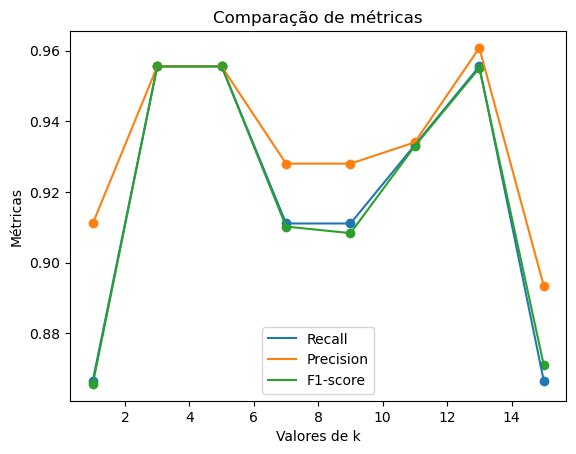

Melhor K: 3


Metrics
Recall     0.977778
Precision  0.979259
F1-score   0.977824

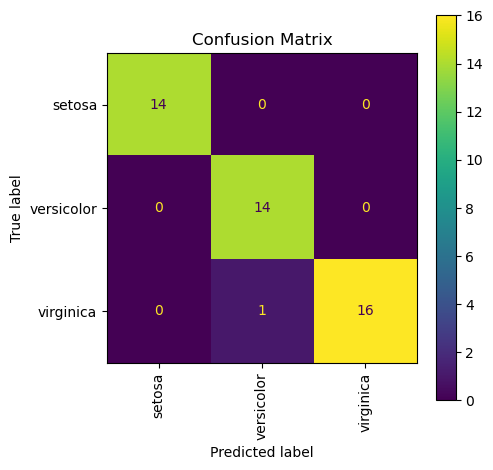

In [106]:
def TVT_212(x, y, metr):
    for k in k_array:
        trainValidation = train_validation_test(x, y, 0.4, 0.3)

        neigh = K_neighbors_classifier(trainValidation['TRAIN'][0], trainValidation['TRAIN'][1], k)
        pred = neigh.predict(trainValidation['VALIDATION'][0])
        true = trainValidation['VALIDATION'][1]
        cm, rs, ps, f1 = metrics(true, pred)

        metr["Neigh"].append(neigh)
        metr["Recall"].append(rs)
        metr["Precision"].append(ps)
        metr["F1-score"].append(f1)
    
    return metr

def plot_metricas(metr):
    plt.figure()

    plt.plot(k_array, metr["Recall"], label="Recall")
    plt.scatter(k_array, metr["Recall"])
    plt.plot(k_array, metr["Precision"], label="Precision")
    plt.scatter(k_array, metr["Precision"])
    plt.plot(k_array, metr["F1-score"], label="F1-score")
    plt.scatter(k_array, metr["F1-score"])
    
    plt.title("Comparação de métricas")
    plt.xlabel("Valores de k")
    plt.ylabel("Métricas")
    plt.legend()
    plt.show()

def TVT_gama(x, y, labels):
    metr = {"Neigh": [], "Recall": [], "Precision": [], "F1-score": []}
    
    new_metr = TVT_212(x, y, metr)

    plot_metricas(new_metr)

    pos_k = new_metr["F1-score"].index(max(new_metr["F1-score"]))
    best_k = k_array[pos_k]
    print("Melhor K: " + str(best_k))

    trainValidation = train_validation_test(x, y, 0.4, 0.3)

    newTrain0 = np.concatenate((trainValidation['TRAIN'][0], trainValidation['VALIDATION'][0]), axis=0)
    newTrain1 = np.concatenate((trainValidation['TRAIN'][1], trainValidation['VALIDATION'][1]), axis=0)

    neigh = K_neighbors_classifier(newTrain0, newTrain1, best_k)
    pred = neigh.predict(trainValidation['TEST'][0])
    true = trainValidation['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)
   
    display_matrix(cm, rs, ps, f1, labels)

    return [cm, rs, ps, f1]

_=TVT_gama(data, target, iris["target_names"])

### 2.1.2. 10x10-fold cross-validation (10CV)

Iteração 0


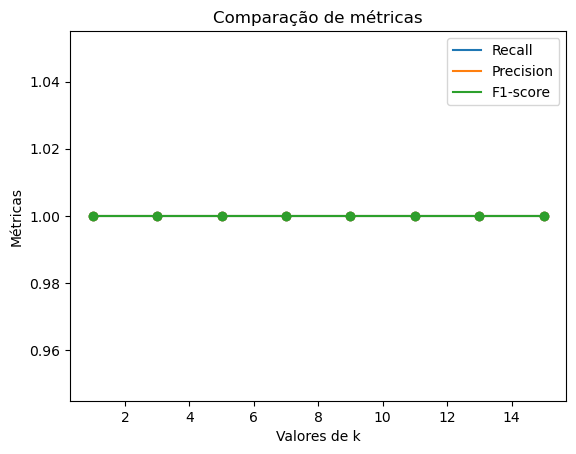

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

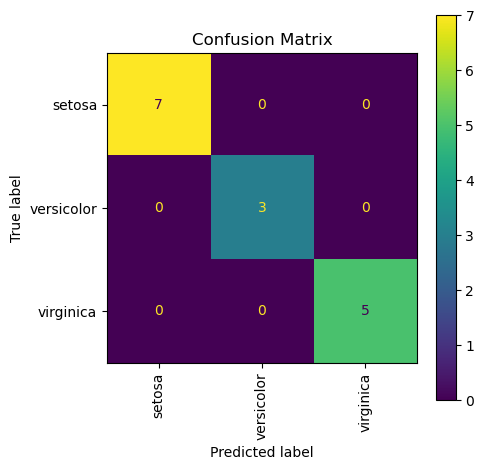

Iteração 1


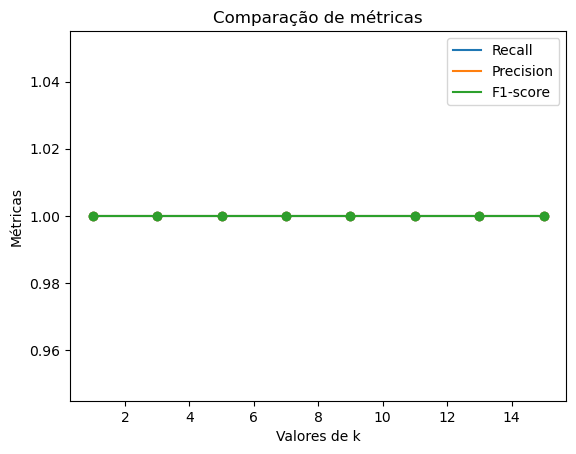

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

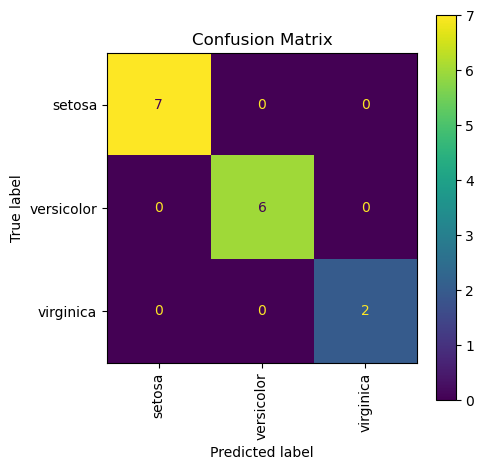

Iteração 2


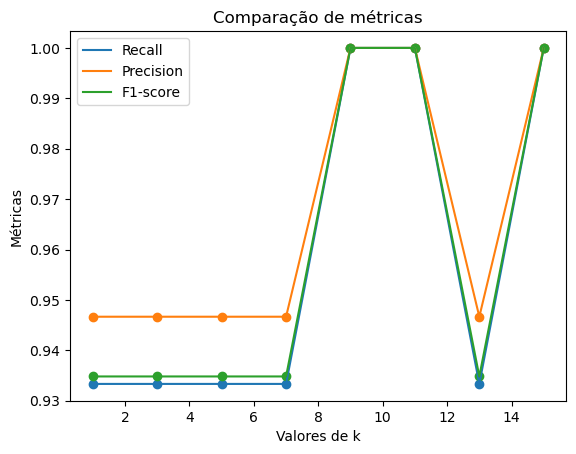

Melhor K: 9


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

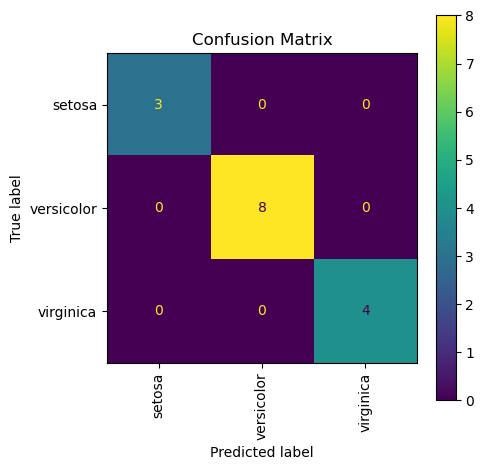

Iteração 3


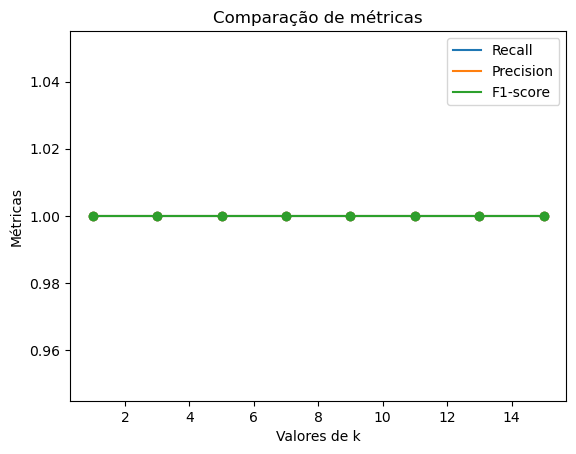

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

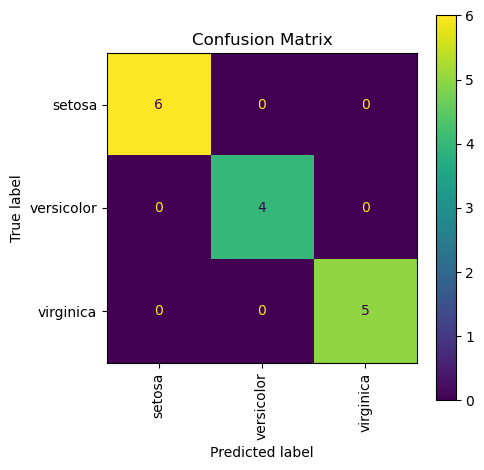

Iteração 4


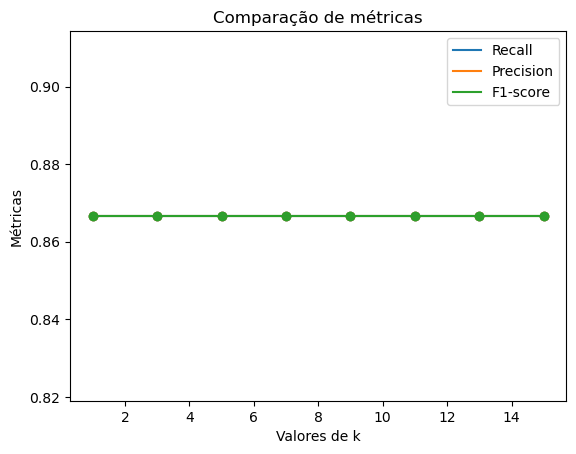

Melhor K: 1


Metrics
Recall     0.866667
Precision  0.866667
F1-score   0.866667

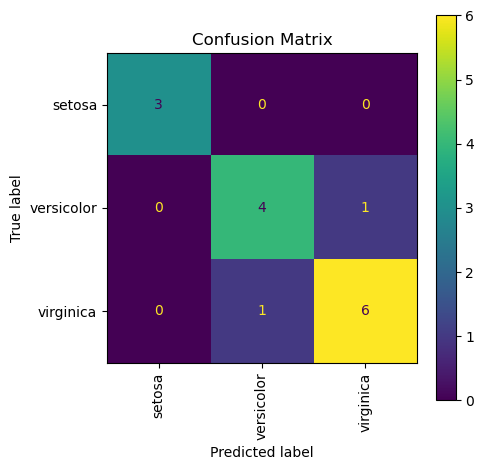

Iteração 5


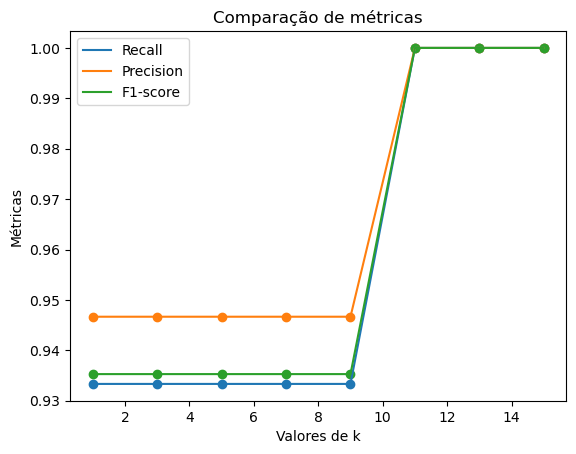

Melhor K: 11


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

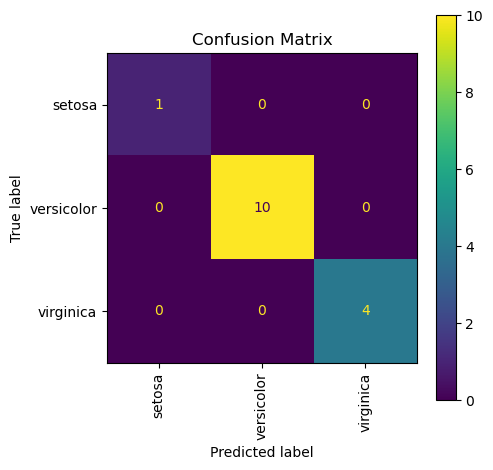

Iteração 6


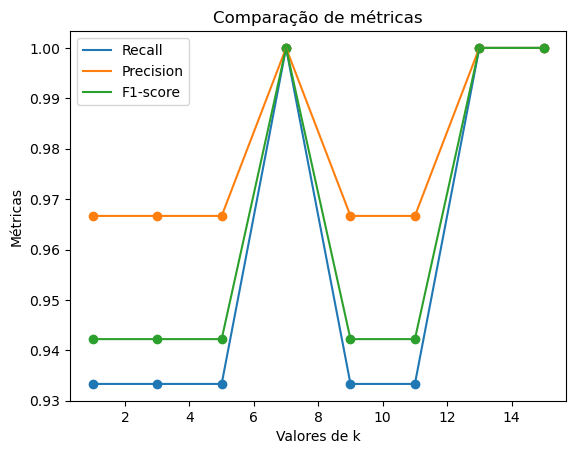

Melhor K: 7


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

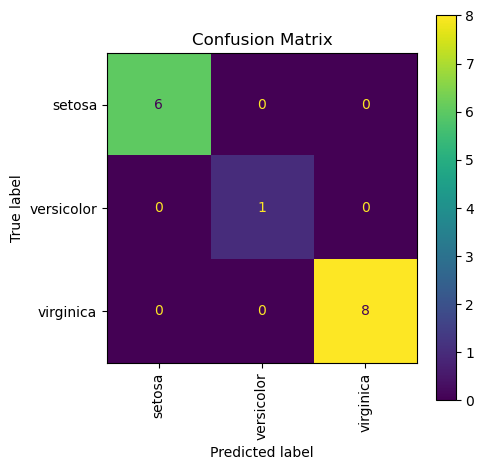

Iteração 7


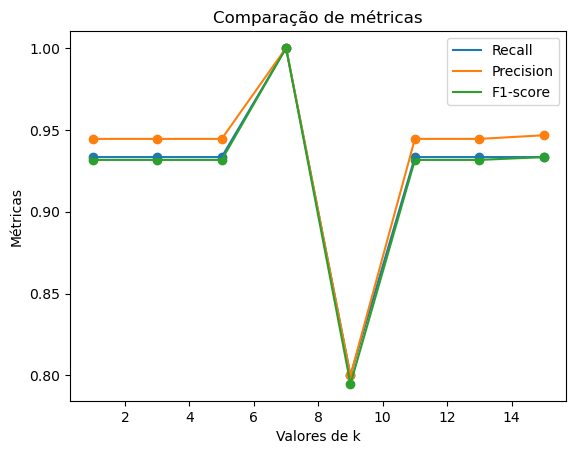

Melhor K: 7


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

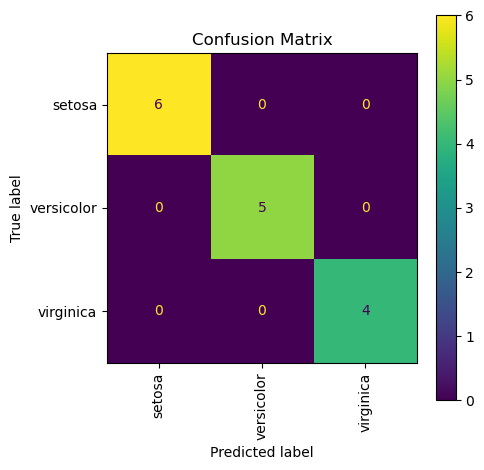

Iteração 8


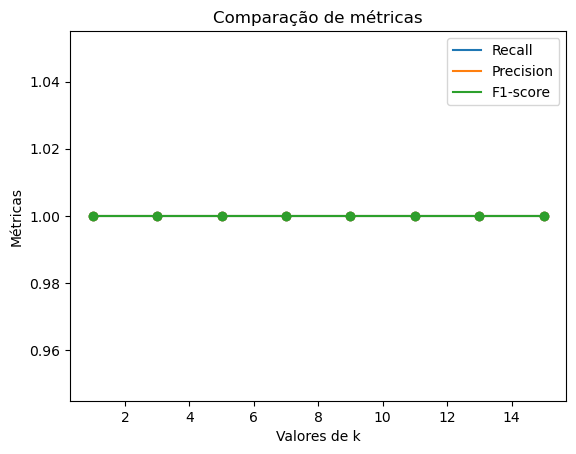

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

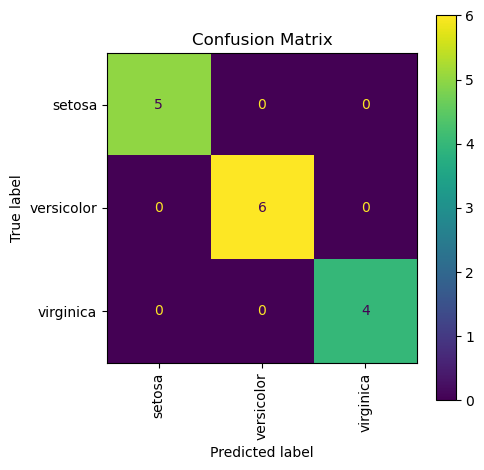

Iteração 9


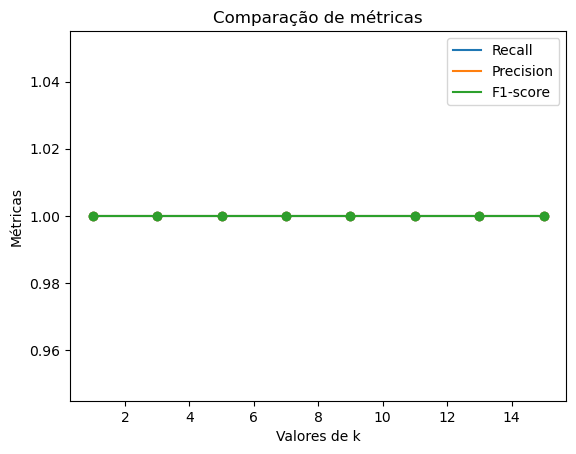

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

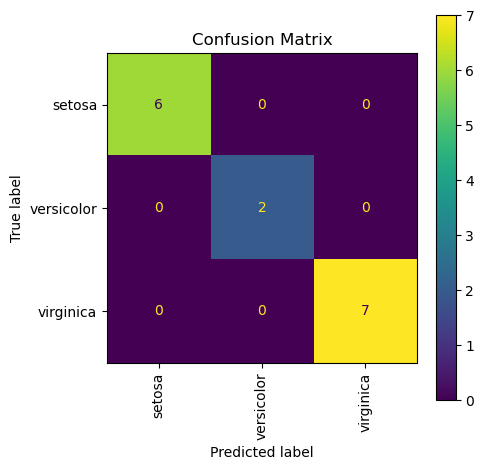

In [107]:
def CV_212(info, metr):
    for k in k_array:
        neigh = K_neighbors_classifier(info['TRAIN'][0], info['TRAIN'][1], k)
        pred = neigh.predict(info['TEST'][0])
        true = info['TEST'][1]
        cm, rs, ps, f1 = metrics(true, pred)

        metr["Neigh"].append(neigh)
        metr["Recall"].append(rs)
        metr["Precision"].append(ps)
        metr["F1-score"].append(f1)

    return metr

def plot_metricas(metr):
    plt.figure()

    plt.plot(k_array, metr["Recall"], label="Recall")
    plt.scatter(k_array, metr["Recall"])
    plt.plot(k_array, metr["Precision"], label="Precision")
    plt.scatter(k_array, metr["Precision"])
    plt.plot(k_array, metr["F1-score"], label="F1-score")
    plt.scatter(k_array, metr["F1-score"])
    
    plt.title("Comparação de métricas")
    plt.xlabel("Valores de k")
    plt.ylabel("Métricas")
    plt.legend()
    plt.show()

def CV_gama(x, y, labels):
    
    kf = K_fold(x, y, 10)
    count = 0
    for info in kf:
        metr = {"Neigh": [], "Recall": [], "Precision": [], "F1-score": []}
        print("Iteração " + str(count))
        count += 1
        new_metr = CV_212(info, metr)

        plot_metricas(new_metr)

        pos_k = new_metr["F1-score"].index(max(new_metr["F1-score"]))
        best_k = k_array[pos_k]
        print("Melhor K: " + str(best_k))

        neigh = K_neighbors_classifier(info['TRAIN'][0], info['TRAIN'][1], best_k)
        pred = neigh.predict(info['TEST'][0])
        true = info['TEST'][1]
        cm, rs, ps, f1 = metrics(true, pred)

        display_matrix(cm, rs, ps, f1, labels)

CV_gama(data, target, iris["target_names"])

### 2.1.3 Análise de resultados

Sendo a métrica Recall a métrica que está relacionada com a Bias podemos dizer que um recall baixo dá uma Bias alta e vice-versa.

Já a métrica de precisão dis respeito à variância, onde uma vâriancia alta faz com que a precisão seja baixa.

Iremos utilizar a função 'TVT_gama' de modo a comparar e analisar estas métricas. 

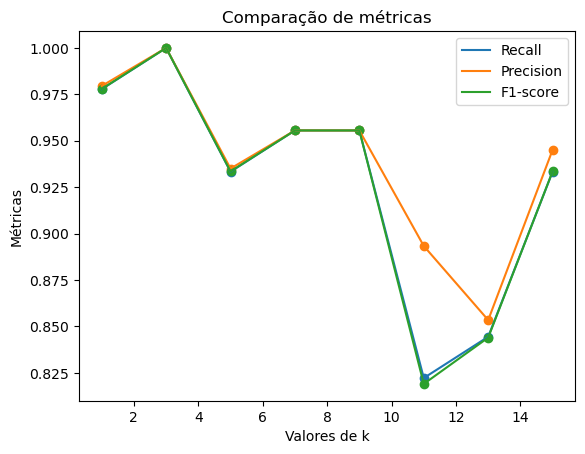

Melhor K: 3


Metrics
Recall     0.955556
Precision  0.955556
F1-score   0.955556

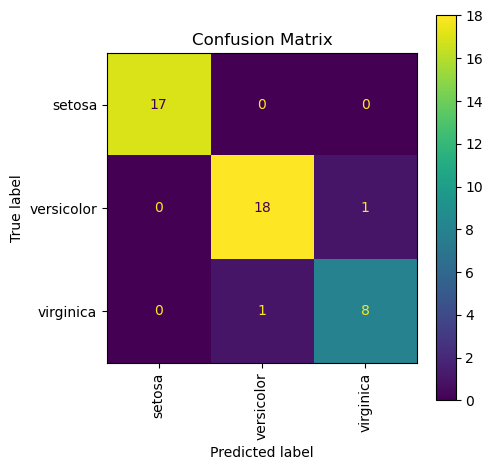

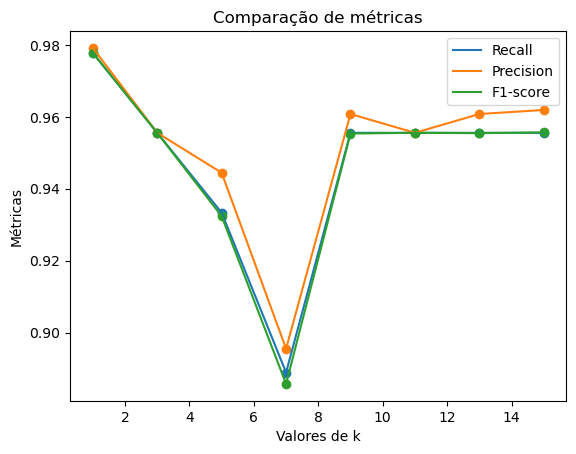

Melhor K: 1


Metrics
Recall     0.933333
Precision  0.934238
F1-score   0.933109

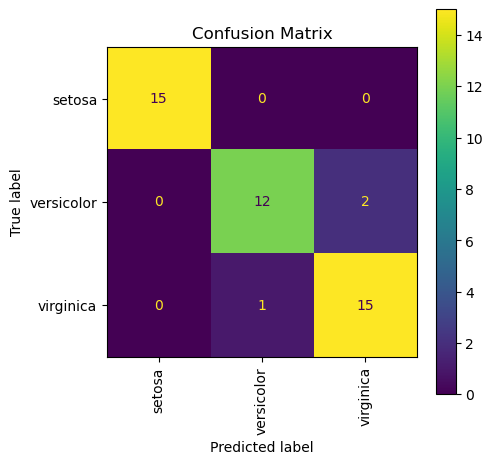

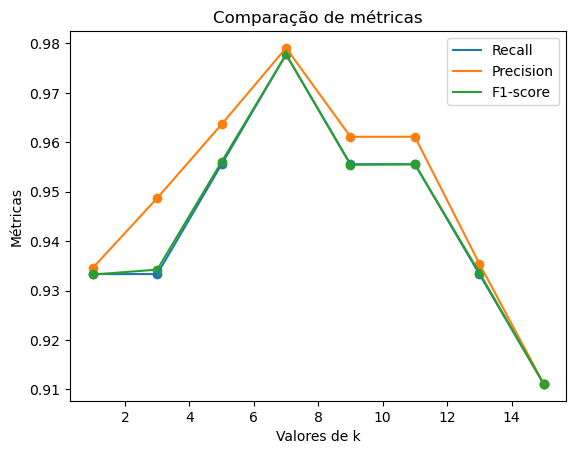

Melhor K: 7


Metrics
Recall     0.955556
Precision  0.961905
F1-score   0.955876

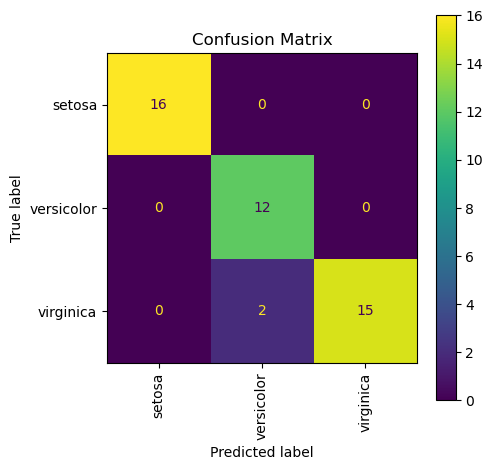

[array([[16,  0,  0],
        [ 0, 12,  0],
        [ 0,  2, 15]]),
 0.9555555555555556,
 0.9619047619047619,
 0.9558760683760684]

In [108]:
TVT_gama(data, target, iris["target_names"])
TVT_gama(data, target, iris["target_names"])
TVT_gama(data, target, iris["target_names"])

Através destes 3 gráficos podemos ver que as duas métricas em análise(Recall e Precision) têm valores semelhantes, para o melhor K repaaramos que as duas métricas são altas e por isso teremos os valores de bias e variância baixos, mas para os outros valores de K os valores das métricas tendem a ser mais baixos e podemos dizer que em geral os gráficos apresentam bias baixo e variância elevada. Tendo em conta estes valores os g´raficos têm overfitting(bias baixo e variância alta).

## 2.2. ReliefF

### 2.2.1 F1-score

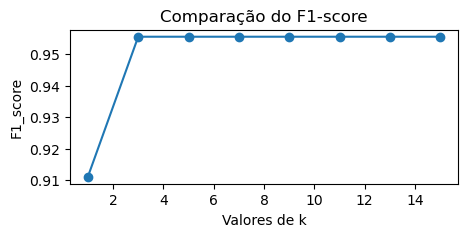

Número of features: 1
Melhor k: 3
F1_score: 0.9330752688172043


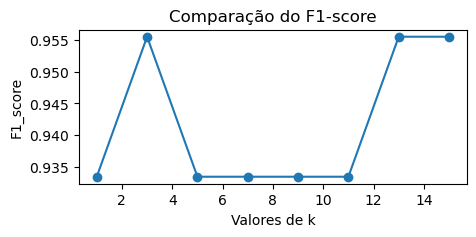

Número of features: 2
Melhor k: 3
F1_score: 0.9334184759472117


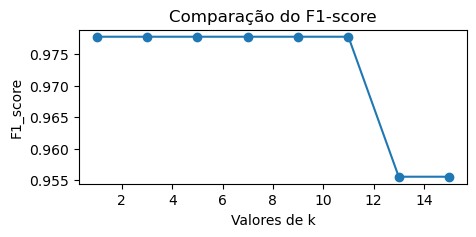

Número of features: 3
Melhor k: 1
F1_score: 0.9334184759472117


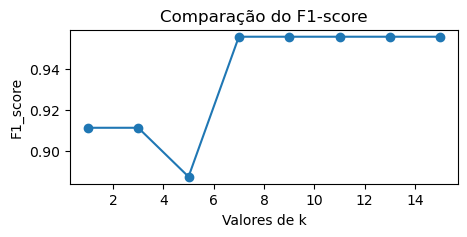

Número of features: 4
Melhor k: 7
F1_score: 0.9555555555555556


k=1       k=3       k=5       k=7       k=9  \
Número of features: 1  0.911111  0.955556  0.955556  0.955556  0.955556   
Número of features: 2  0.933399  0.955556  0.933399  0.933399  0.933399   
Número of features: 3  0.977800  0.977800  0.977800  0.977800  0.977800   
Número of features: 4  0.911111  0.911111  0.887221  0.955556  0.955556   

                           k=11      k=13      k=15  
Número of features: 1  0.955556  0.955556  0.955556  
Número of features: 2  0.933399  0.955556  0.955556  
Número of features: 3  0.977800  0.955556  0.955556  
Número of features: 4  0.955556  0.955556  0.955556

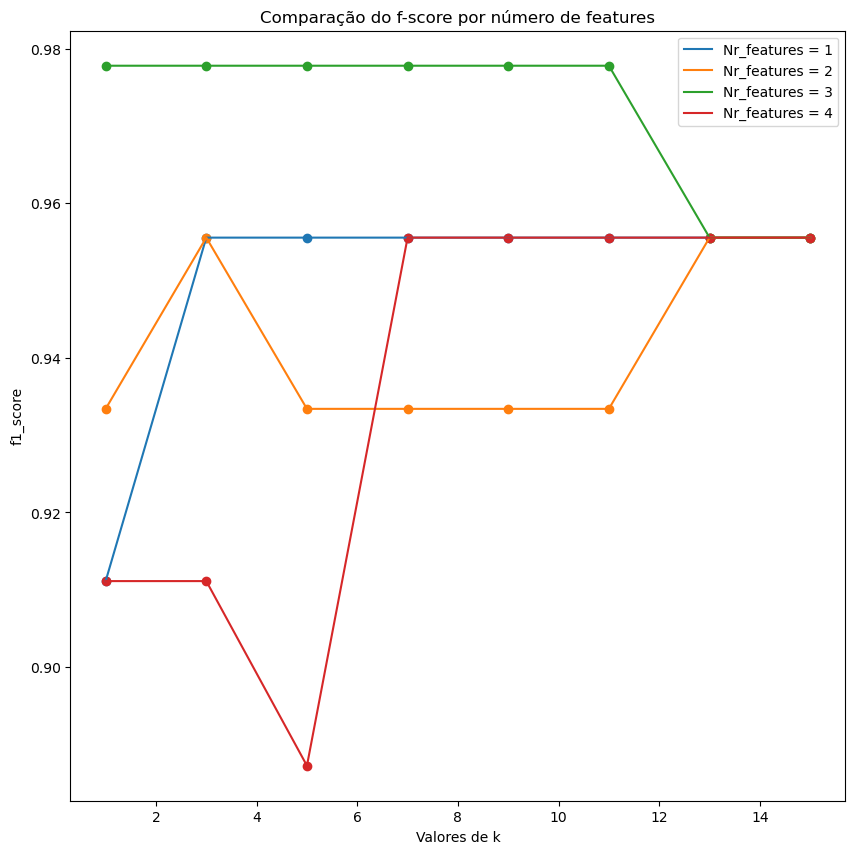

In [109]:
def reliefF(x, y):
    fs = ReliefF(n_features_to_keep=10)
    fs.fit_transform(x, y)

    return fs.top_features[:10]

def plot_f1(metr_f1):
    plt.figure(figsize=(5,2))

    plt.plot(k_array, metr_f1["F1-score"])
    plt.scatter(k_array, metr_f1["F1-score"])
    
    plt.title("Comparação do F1-score")
    plt.xlabel("Valores de k")
    plt.ylabel("F1_score")
    plt.show()

def bestkTVT(metr, feat, xTrain, xValidation, trainValidation, s):
    s += 'Número of features: ' + str(len(feat)) + '\n'
    print('Número of features: ' + str(len(feat)))
    pos_k = metr["F1-score"].index(max(metr["F1-score"]))
    best_k = k_array[pos_k]
    s += "Melhor k: " + str(best_k) + '\n'
    print("Melhor k: " + str(best_k))

    newTrain0 = np.concatenate((xTrain, xValidation), axis=0)
    newTrain1 = np.concatenate((trainValidation['TRAIN'][1], trainValidation['VALIDATION'][1]), axis=0)

    neigh = K_neighbors_classifier(newTrain0, newTrain1, best_k)
    xTest = trainValidation['TEST'][0][:,feat]
    pred = neigh.predict(xTest)
    true = trainValidation['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)

    s += 'F1_score: ' + str(f1) + '\n' + '-'*50 + '\n'
    print('F1_score: ' + str(f1))
    
    return f1, s

def plot_final(f1_score):
    plt.figure(figsize=(10,10))

    for f in range(len(f1_score)):

        plt.plot(k_array, f1_score[f], label="Nr_features = " + str(f+1))
        plt.scatter(k_array, f1_score[f])
    
    plt.title("Comparação do f-score por número de features")
    plt.xlabel("Valores de k")
    plt.ylabel("f1_score")
    plt.legend()
    plt.show()

def repeatTVT(x, y, featselec, num = 4):

    trainValidation = train_validation_test(x, y, 0.4, 0.3)

    f1_score = []
    f1_score_elbow = []
    str_print = ''

    for f in range(num):
        metr = {"F1-score": []}
        feat = featselec[:(f+1)]
        xTrain = trainValidation['TRAIN'][0][:,feat]
        xValidation = trainValidation['VALIDATION'][0][:,feat]

        for k in k_array:
            neigh = K_neighbors_classifier(xTrain, trainValidation['TRAIN'][1], k)
            pred = neigh.predict(xValidation)
            true = trainValidation['VALIDATION'][1]
            cm, rs, ps, f1 = metrics(true, pred)

            metr["F1-score"].append(f1)
        f1_score.append(metr["F1-score"])

        plot_f1(metr)

        aux, str_print = bestkTVT(metr, feat, xTrain, xValidation, trainValidation, str_print)
        f1_score_elbow.append(aux)

    label = ['Número of features: ' + str(i+1) for i in range(len(featselec))]
    col = ['k=' + str(i) for i in k_array]
    df = pd.DataFrame(f1_score, columns = col, index = label)
    display(df)
    plot_final(f1_score)

    return f1_score_elbow, df, str_print
        

f1_score_elbow, df223, str_print = repeatTVT(data, target, reliefF(data, target))

### 2.2.2 Gráfico do cotovelo

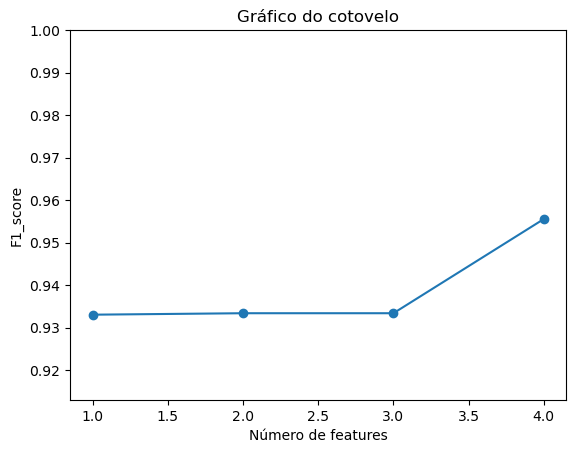

In [110]:
def elbowGraph(f1, num):
    index = np.arange(1,num)

    plt.ylim(min(f1)-0.02,1)

    plt.plot(index, f1)
    plt.scatter(index, f1)
    
    plt.title("Gráfico do cotovelo")
    plt.xlabel("Número de features")
    plt.ylabel("F1_score")
    plt.show()

elbowGraph(f1_score_elbow, 5)

### 2.2.3. Resultados da validação

In [111]:
display(df223)

k=1       k=3       k=5       k=7       k=9  \
Número of features: 1  0.911111  0.955556  0.955556  0.955556  0.955556   
Número of features: 2  0.933399  0.955556  0.933399  0.933399  0.933399   
Número of features: 3  0.977800  0.977800  0.977800  0.977800  0.977800   
Número of features: 4  0.911111  0.911111  0.887221  0.955556  0.955556   

                           k=11      k=13      k=15  
Número of features: 1  0.955556  0.955556  0.955556  
Número of features: 2  0.933399  0.955556  0.955556  
Número of features: 3  0.977800  0.955556  0.955556  
Número of features: 4  0.955556  0.955556  0.955556

## Análise de resultados

Em relação ao dilema bias-variance e ao underfitting-overfitting não conseguimos tirar conclusões uma vez que as métricas usadas nestes exercícios são apenas o f1-score que é uma junção das métricas recall e precision, para analisar estes dilemas precisariamos destas duas métricas.

### 2.2.4. Resultados dos testes

In [112]:
print(str_print)

Número of features: 1
Melhor k: 3
F1_score: 0.9330752688172043
--------------------------------------------------
Número of features: 2
Melhor k: 3
F1_score: 0.9334184759472117
--------------------------------------------------
Número of features: 3
Melhor k: 1
F1_score: 0.9334184759472117
--------------------------------------------------
Número of features: 4
Melhor k: 7
F1_score: 0.9555555555555556
--------------------------------------------------


Comparando os resultados do modelo ideal no conjunto de teste e de validação percebemos que os valores da validação são mais altos que nos do teste uma vez que o conjunto de validação serve para ajustar parâmetros do modelo e por isso normalmente os erros tendem a ser menores do que no conjunto de teste, obtendo assim um valor de F1-score superior.

### 2.3. Fisher Score

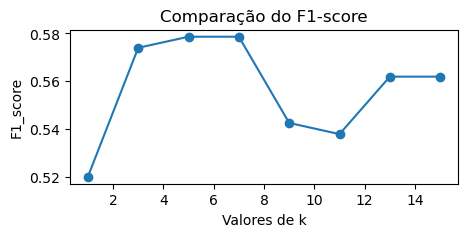

Número of features: 1
Melhor k: 5
F1_score: 0.291153222187705


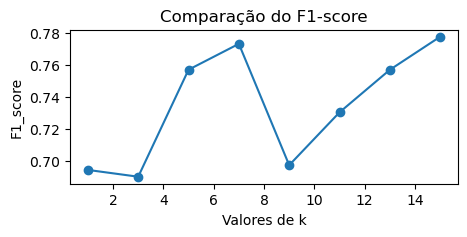

Número of features: 2
Melhor k: 15
F1_score: 0.8875983997935217


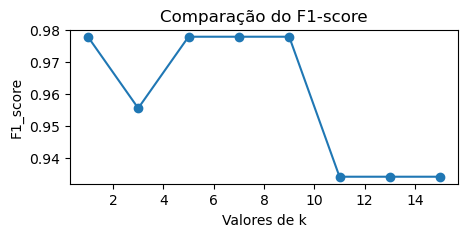

Número of features: 3
Melhor k: 1
F1_score: 0.9115497076023391


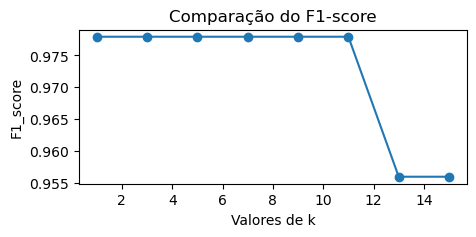

Número of features: 4
Melhor k: 1
F1_score: 0.9329969161760583


k=1       k=3       k=5       k=7       k=9  \
Número of features: 1  0.519949  0.573980  0.578615  0.578615  0.542489   
Número of features: 2  0.694560  0.690316  0.757166  0.773333  0.697531   
Número of features: 3  0.977924  0.955556  0.977924  0.977924  0.977924   
Número of features: 4  0.977924  0.977924  0.977924  0.977924  0.977924   

                           k=11      k=13      k=15  
Número of features: 1  0.537802  0.561885  0.561885  
Número of features: 2  0.730540  0.757117  0.777778  
Número of features: 3  0.934108  0.934108  0.934108  
Número of features: 4  0.977924  0.956019  0.956019

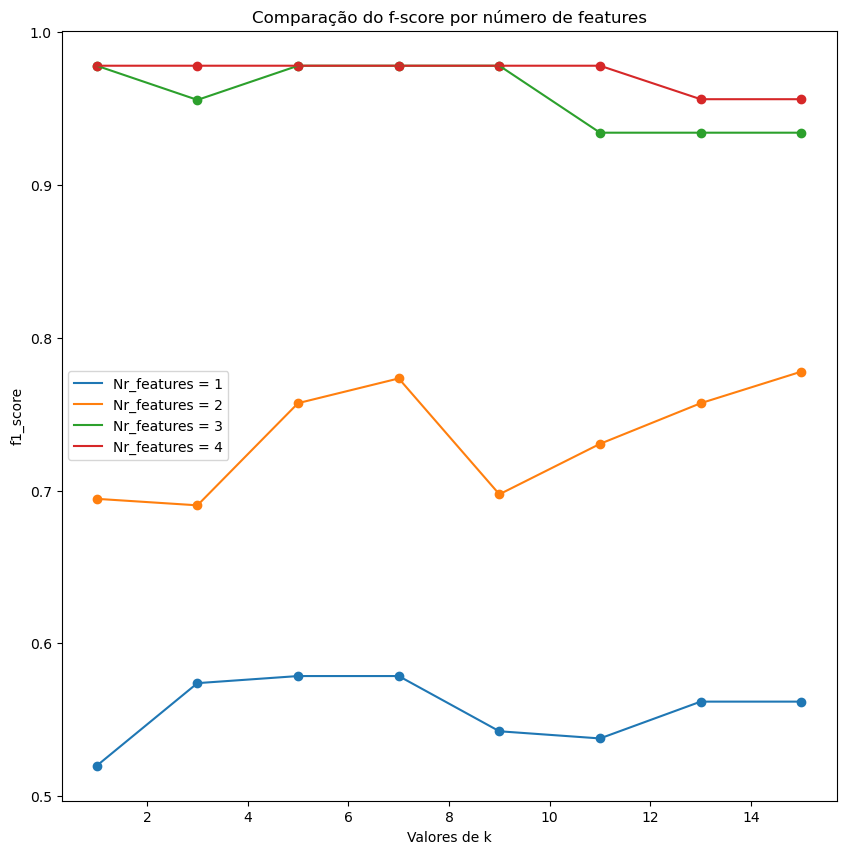

In [113]:
score = fisher_score.fisher_score(data, target)

f1_score_elbow, df223, str_print = repeatTVT(data, target, score)

### 2.3.2. Gráfico do cotovelo

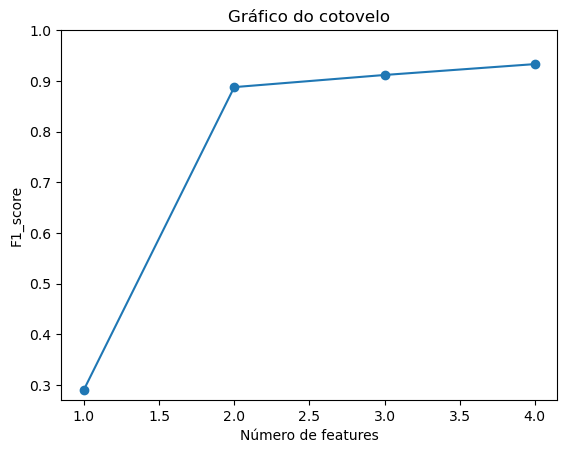

In [114]:
elbowGraph(f1_score_elbow, 5)

### 2.3.3. Resultados de validação

In [115]:
display(df223)

k=1       k=3       k=5       k=7       k=9  \
Número of features: 1  0.519949  0.573980  0.578615  0.578615  0.542489   
Número of features: 2  0.694560  0.690316  0.757166  0.773333  0.697531   
Número of features: 3  0.977924  0.955556  0.977924  0.977924  0.977924   
Número of features: 4  0.977924  0.977924  0.977924  0.977924  0.977924   

                           k=11      k=13      k=15  
Número of features: 1  0.537802  0.561885  0.561885  
Número of features: 2  0.730540  0.757117  0.777778  
Número of features: 3  0.934108  0.934108  0.934108  
Número of features: 4  0.977924  0.956019  0.956019

### 2.3.4. Resultados dos testes

In [116]:
print(str_print)

Número of features: 1
Melhor k: 5
F1_score: 0.291153222187705
--------------------------------------------------
Número of features: 2
Melhor k: 15
F1_score: 0.8875983997935217
--------------------------------------------------
Número of features: 3
Melhor k: 1
F1_score: 0.9115497076023391
--------------------------------------------------
Número of features: 4
Melhor k: 1
F1_score: 0.9329969161760583
--------------------------------------------------


### 2.4. Class imbalance

In [117]:
irisDF = pd.DataFrame(iris.data, columns=iris["feature_names"])
irisDF["target"] = iris["target"]
setosa = irisDF[irisDF["target"] == 0]
versicolor = irisDF[irisDF["target"] == 1].sample(30)
virginica = irisDF[irisDF["target"] == 2].sample(10)
new_iris = pd.concat([setosa, versicolor, virginica], axis=0)
new_iris.groupby("target").count()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                      50                50                 50   
1                      30                30                 30   
2                      10                10                 10   

        petal width (cm)  
target                    
0                     50  
1                     30  
2                     10

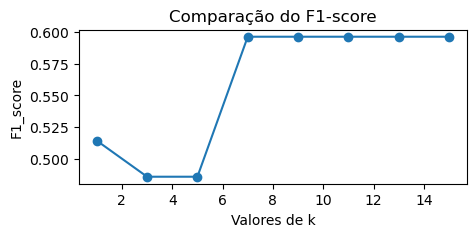

Número of features: 1
Melhor k: 7
F1_score: 0.6407869545124448


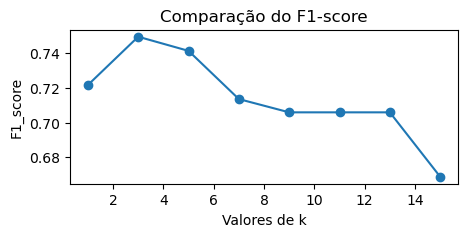

Número of features: 2
Melhor k: 3
F1_score: 0.7713365539452496


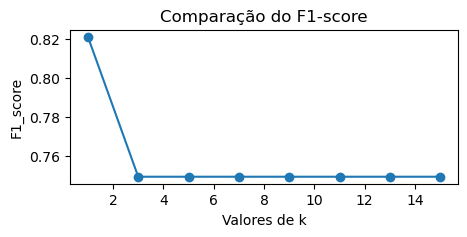

Número of features: 3
Melhor k: 1
F1_score: 0.86280193236715


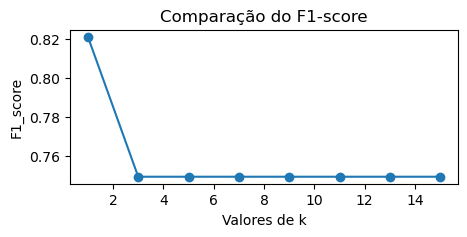

Número of features: 4
Melhor k: 1
F1_score: 1.0


k=1       k=3       k=5       k=7       k=9  \
Número of features: 1  0.514310  0.485839  0.485839  0.596391  0.596391   
Número of features: 2  0.721625  0.749455  0.741302  0.713524  0.705882   
Número of features: 3  0.820988  0.749455  0.749455  0.749455  0.749455   
Número of features: 4  0.820988  0.749455  0.749455  0.749455  0.749455   

                           k=11      k=13      k=15  
Número of features: 1  0.596391  0.596391  0.596391  
Número of features: 2  0.705882  0.705882  0.668783  
Número of features: 3  0.749455  0.749455  0.749455  
Número of features: 4  0.749455  0.749455  0.749455

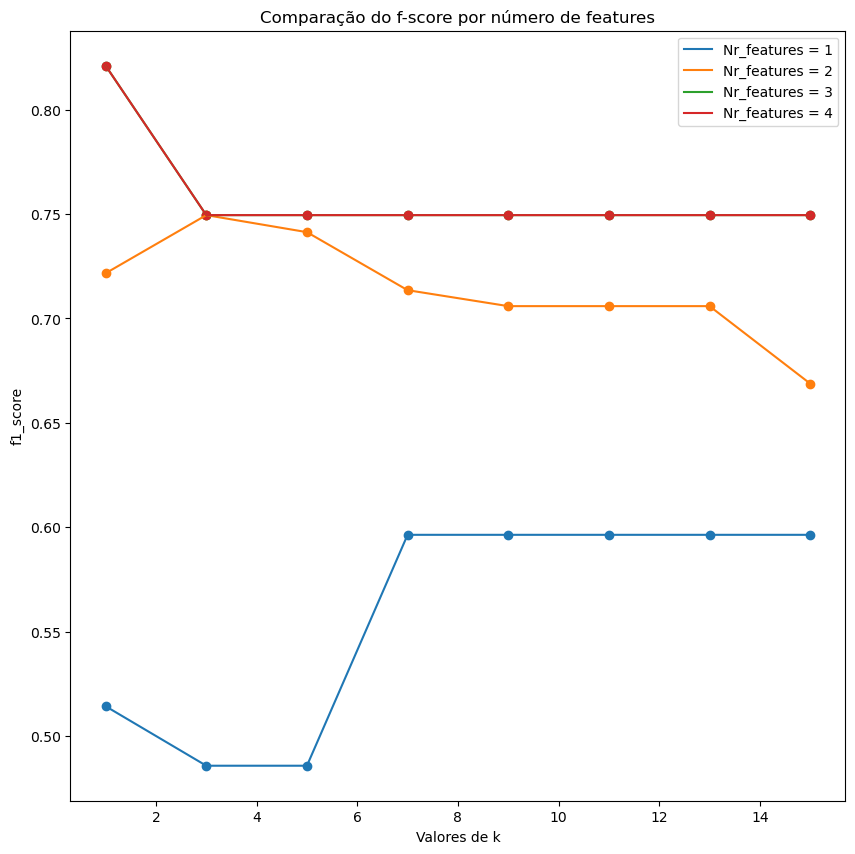

In [118]:
aux_data = np.array(new_iris.drop(columns=["target"]))
aux_target = np.array(new_iris["target"])

score = fisher_score.fisher_score(aux_data, aux_target)

newIris_elbow, df224, str_print = repeatTVT(aux_data, aux_target, score)

### 2.4.2. Gráfico do cotovelo

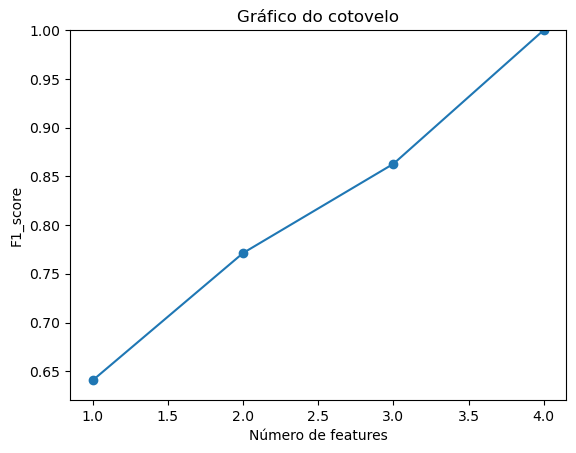

In [119]:
elbowGraph(newIris_elbow, 5)

### 2.4.3. Resultados da validação

In [120]:
display(df224)

k=1       k=3       k=5       k=7       k=9  \
Número of features: 1  0.514310  0.485839  0.485839  0.596391  0.596391   
Número of features: 2  0.721625  0.749455  0.741302  0.713524  0.705882   
Número of features: 3  0.820988  0.749455  0.749455  0.749455  0.749455   
Número of features: 4  0.820988  0.749455  0.749455  0.749455  0.749455   

                           k=11      k=13      k=15  
Número of features: 1  0.596391  0.596391  0.596391  
Número of features: 2  0.705882  0.705882  0.668783  
Número of features: 3  0.749455  0.749455  0.749455  
Número of features: 4  0.749455  0.749455  0.749455

### 2.4.4. Resultados dos testes

In [121]:
print(str_print)

Número of features: 1
Melhor k: 7
F1_score: 0.6407869545124448
--------------------------------------------------
Número of features: 2
Melhor k: 3
F1_score: 0.7713365539452496
--------------------------------------------------
Número of features: 3
Melhor k: 1
F1_score: 0.86280193236715
--------------------------------------------------
Número of features: 4
Melhor k: 1
F1_score: 1.0
--------------------------------------------------


## Análise de resultados

Devido ao desbalanceamento do dataset os valores obtidos são piores, pois isto faz com que a classificação do modelo seja errado para alguns elementos fazendo a métrica do f1-Score diminuir.

## 3. ReliefF for facial expression dataset

In [122]:
new_data = pd.read_csv("features.csv")
new_target = np.array(new_data["Unnamed: 0"])
all_emotions = []
for emotion in range(len(new_target)):
    new_emotion=np.array(new_target[emotion][6:8])
    all_emotions.append(new_emotion.astype(float))
all_np = np.array(all_emotions)
feature_data = np.array(new_data.drop(columns = ["Unnamed: 0"]))
emotions=[1,2,3,4,5,6,7,8]

### 3.1.1 Train only

Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

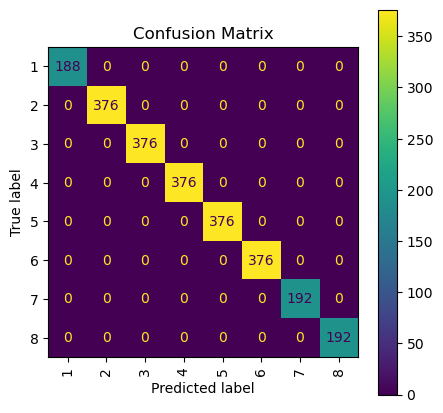

In [123]:
TO_211(feature_data, all_np, emotions, 1)

### 3.1.1. TT 70-30

Metrics
Recall     0.762228
Precision  0.771549
F1-score   0.763098

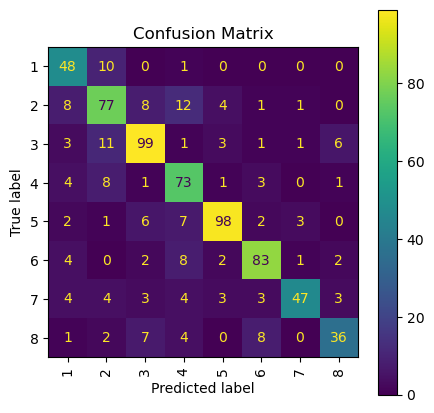

In [124]:
TT70_30_211(feature_data, all_np, emotions, 1)

### 3.1.1. 10x10-fold cross-validation (10CV)

Iteração 0


Metrics
Recall     0.800813
Precision  0.811370
F1-score   0.801296

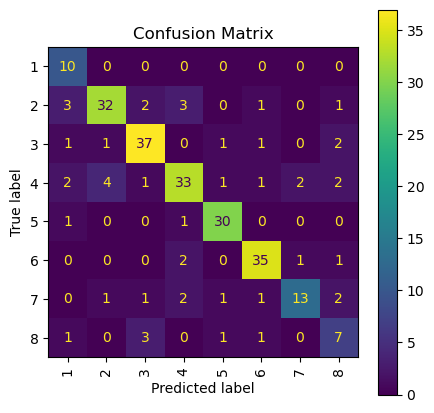

Iteração 1


Metrics
Recall     0.813008
Precision  0.817706
F1-score   0.813923

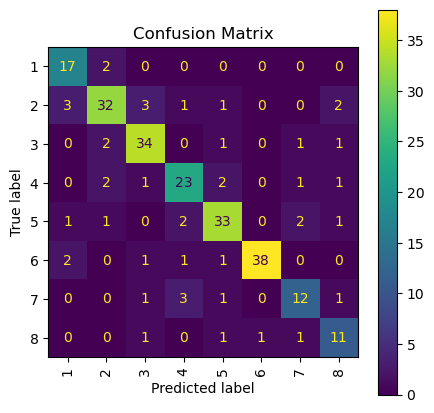

Iteração 2


Metrics
Recall     0.828571
Precision  0.828860
F1-score   0.826048

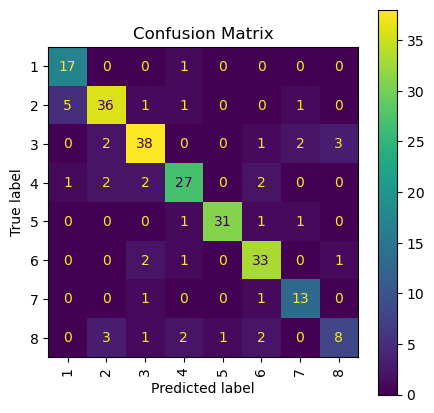

Iteração 3


Metrics
Recall     0.779592
Precision  0.783900
F1-score   0.780601

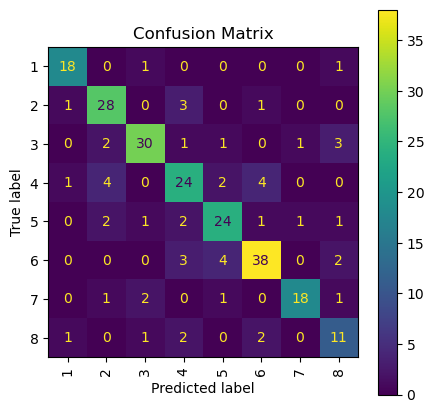

Iteração 4


Metrics
Recall     0.755102
Precision  0.759634
F1-score   0.753231

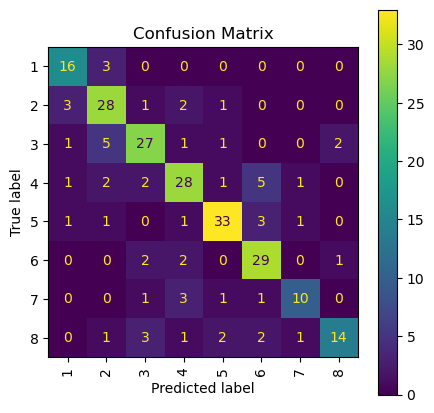

Iteração 5


Metrics
Recall     0.840816
Precision  0.842589
F1-score   0.839848

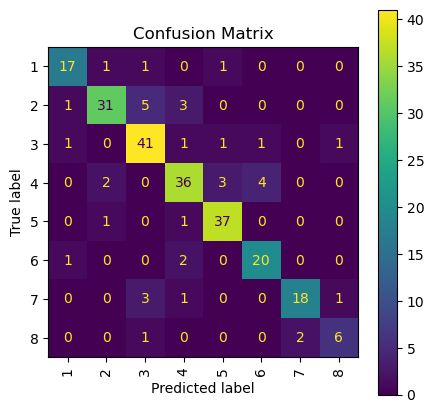

Iteração 6


Metrics
Recall     0.804082
Precision  0.810167
F1-score   0.803275

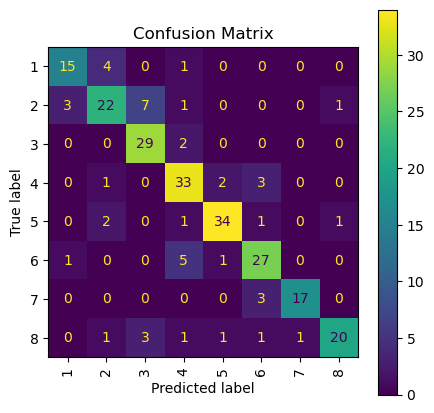

Iteração 7


Metrics
Recall     0.808163
Precision  0.814586
F1-score   0.806314

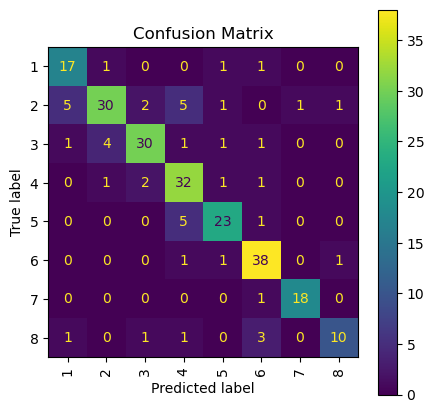

Iteração 8


Metrics
Recall     0.779592
Precision  0.785069
F1-score   0.780227

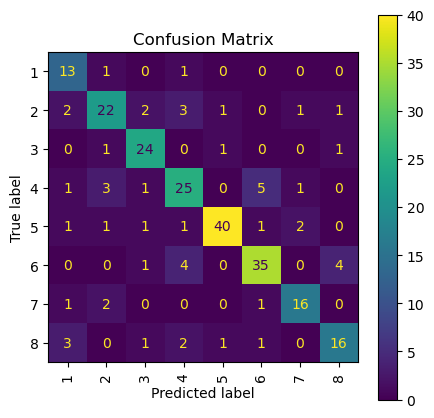

Iteração 9


Metrics
Recall     0.791837
Precision  0.790795
F1-score   0.785717

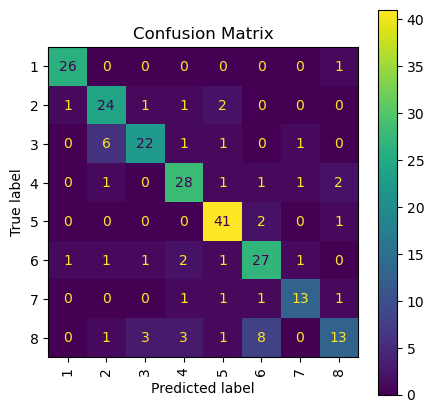

In [125]:
CV_211(feature_data, all_np, 10, emotions, 1)

### 3.1.2. Train-only

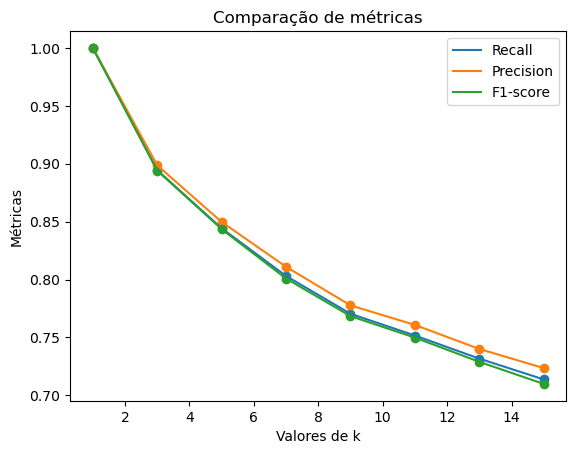

Melhor K: 1


Metrics
Recall         1.0
Precision      1.0
F1-score       1.0

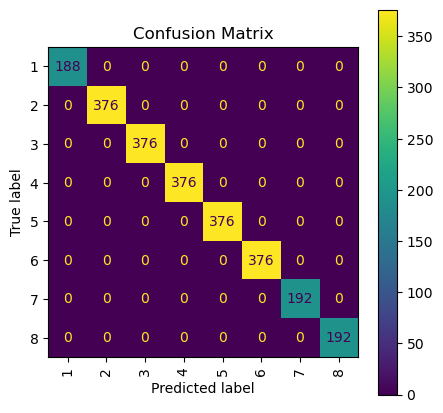

In [126]:
TO_gama(feature_data, all_np, emotions)

### 3.1.2. TVT 40-30-30

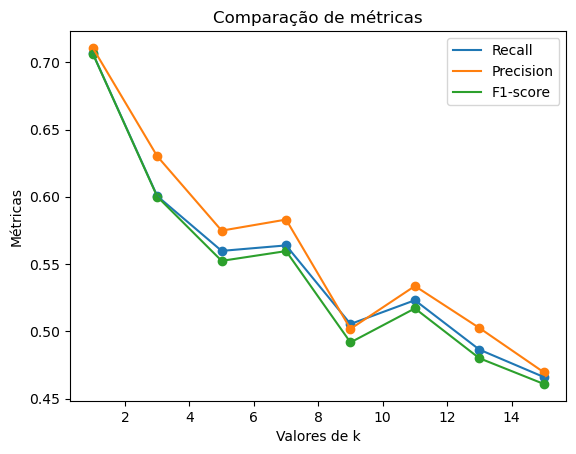

Melhor K: 1


Metrics
Recall     0.760870
Precision  0.762204
F1-score   0.759992

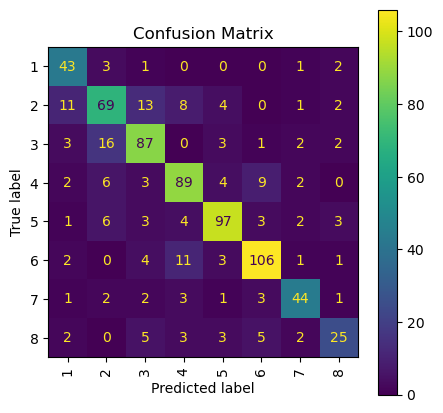

In [127]:
comp_312 = TVT_gama(feature_data, all_np, emotions)

### 3.1.2. 10x10-fold cross-validation (10CV)

Iteração 0


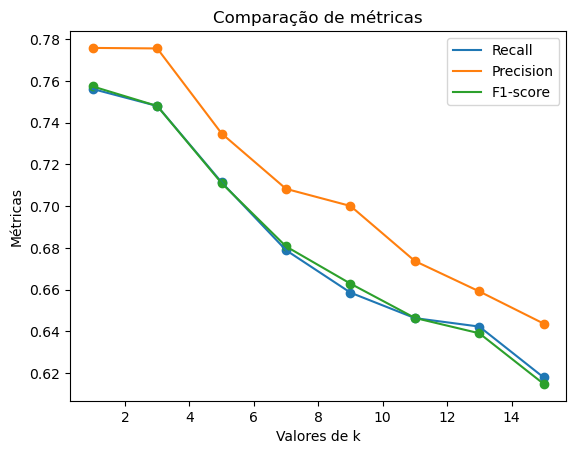

Melhor K: 1


Metrics
Recall     0.756098
Precision  0.775794
F1-score   0.757334

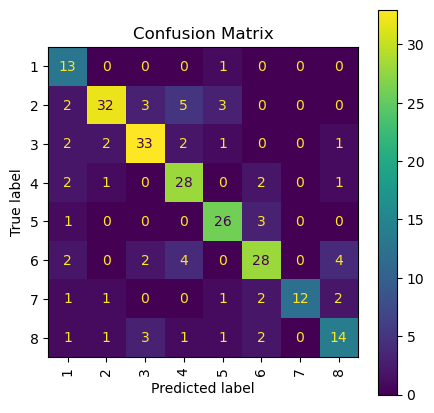

Iteração 1


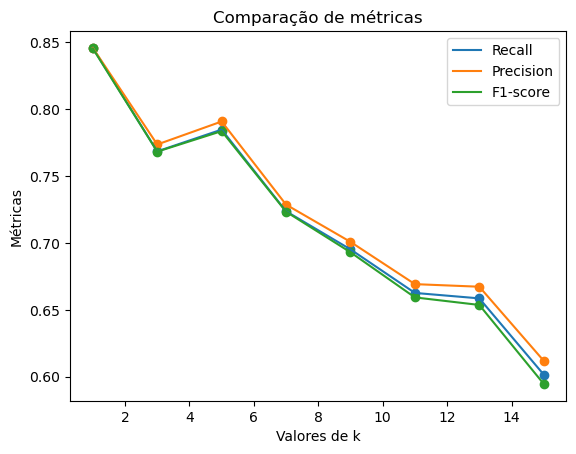

Melhor K: 1


Metrics
Recall     0.845528
Precision  0.845535
F1-score   0.845111

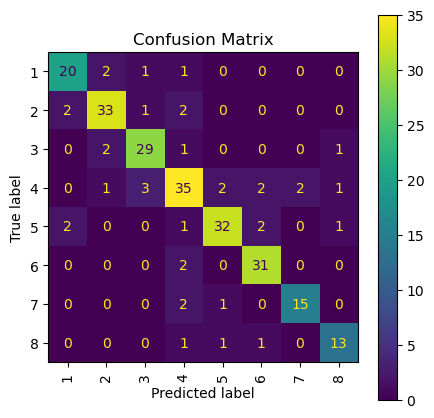

Iteração 2


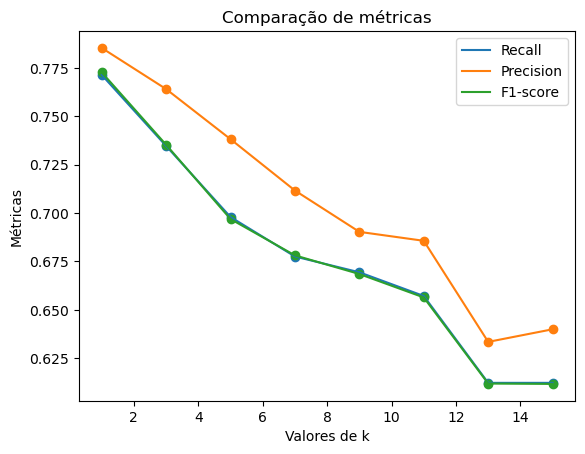

Melhor K: 1


Metrics
Recall     0.771429
Precision  0.785362
F1-score   0.772752

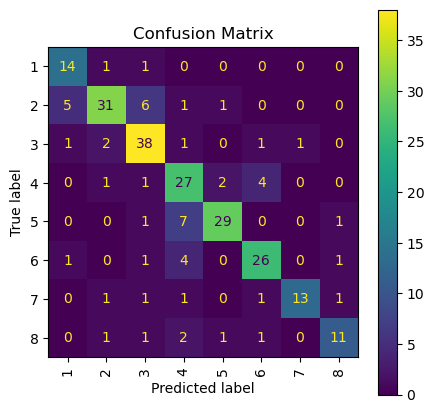

Iteração 3


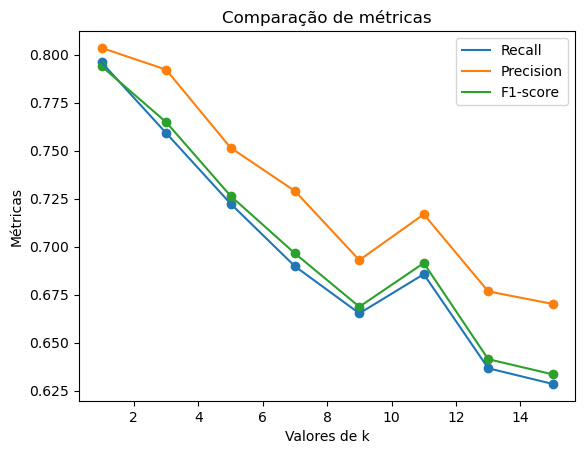

Melhor K: 1


Metrics
Recall     0.795918
Precision  0.803496
F1-score   0.793899

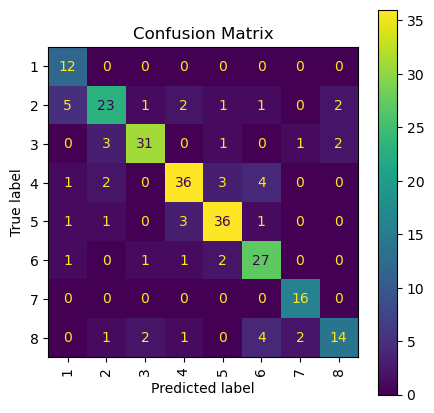

Iteração 4


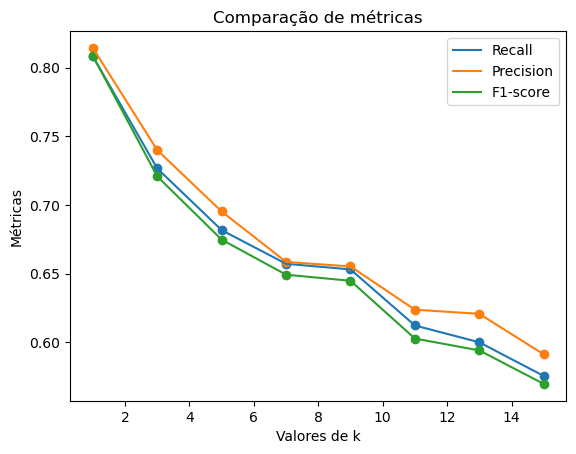

Melhor K: 1


Metrics
Recall     0.808163
Precision  0.814261
F1-score   0.808546

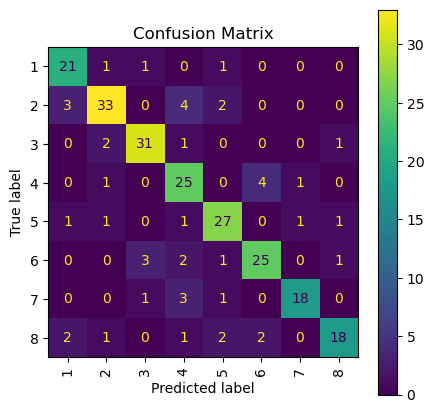

Iteração 5


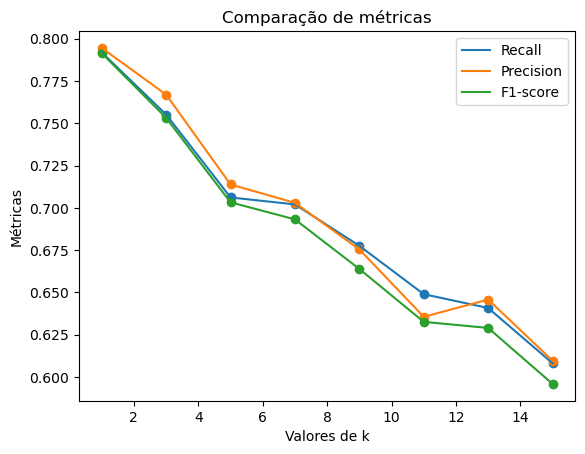

Melhor K: 1


Metrics
Recall     0.791837
Precision  0.794475
F1-score   0.791389

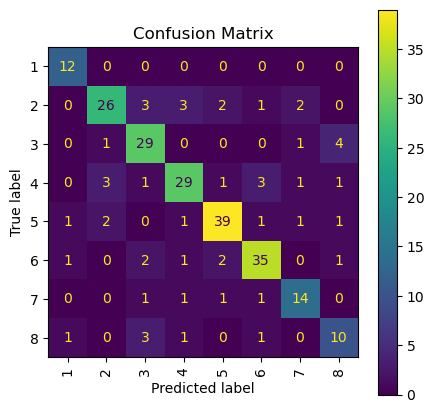

Iteração 6


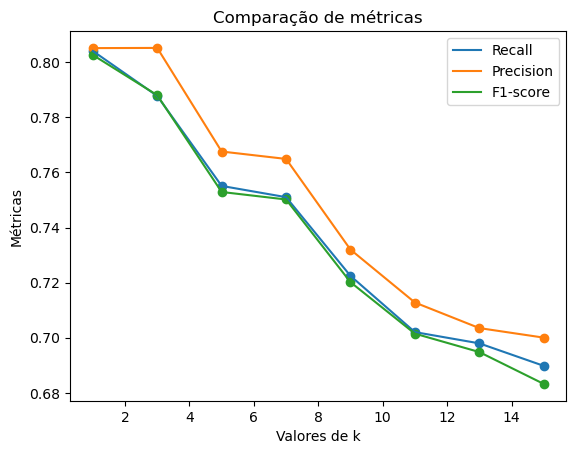

Melhor K: 1


Metrics
Recall     0.804082
Precision  0.805122
F1-score   0.802629

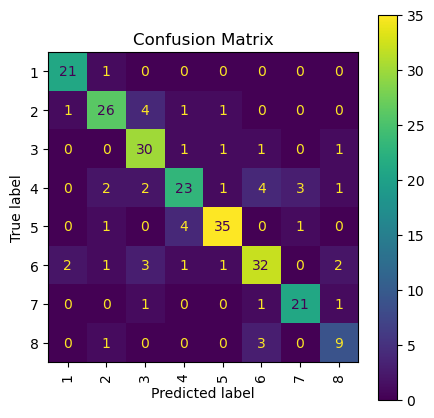

Iteração 7


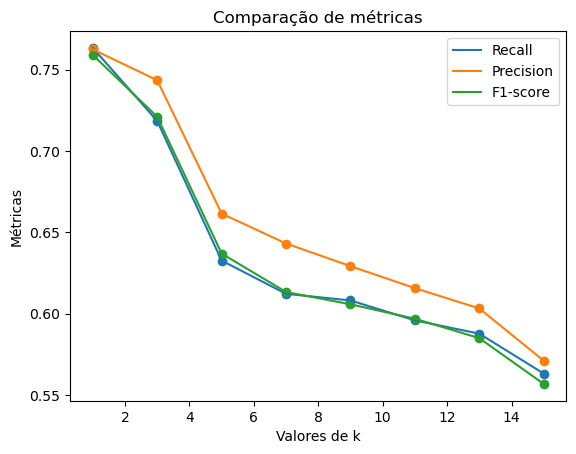

Melhor K: 1


Metrics
Recall     0.763265
Precision  0.762349
F1-score   0.758911

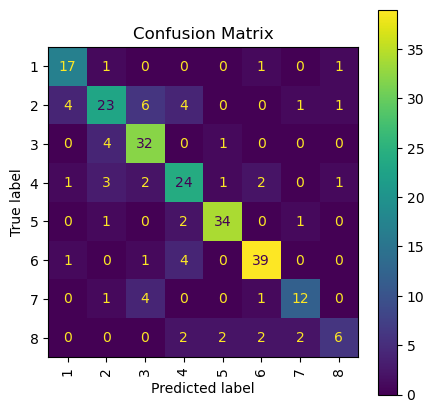

Iteração 8


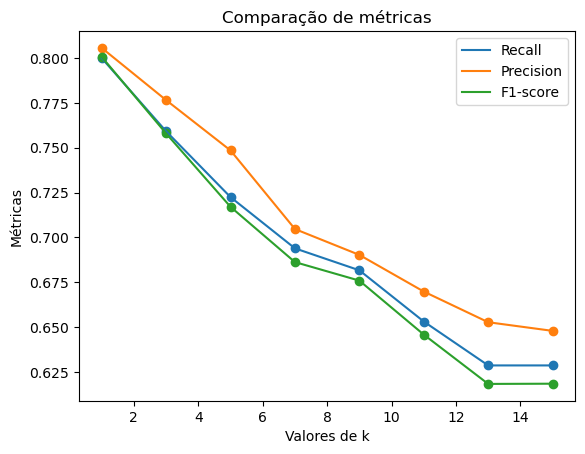

Melhor K: 1


Metrics
Recall     0.800000
Precision  0.805679
F1-score   0.800707

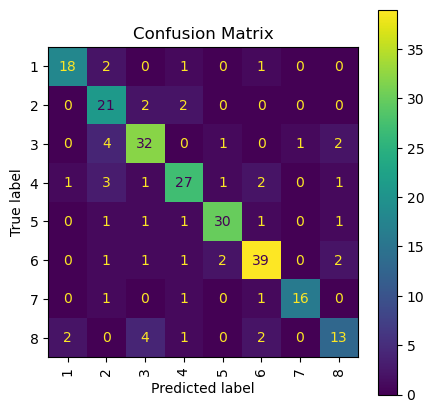

Iteração 9


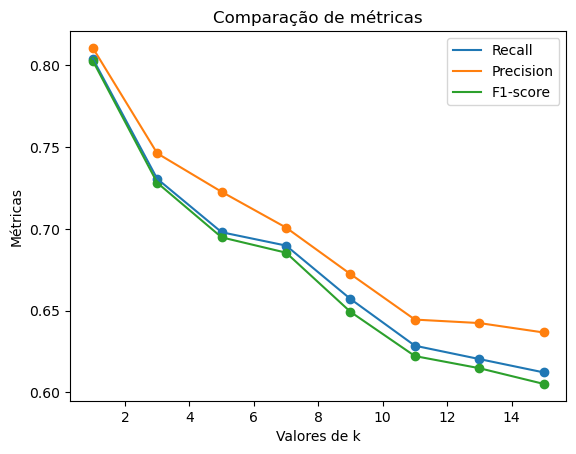

Melhor K: 1


Metrics
Recall     0.804082
Precision  0.810680
F1-score   0.802820

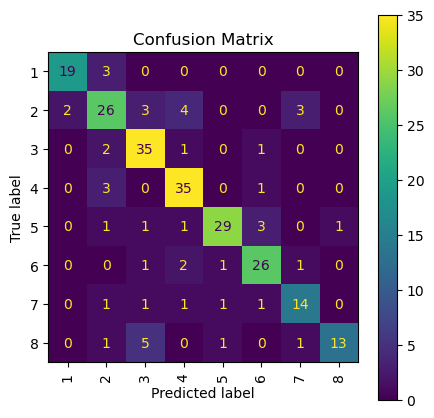

In [128]:
CV_gama(feature_data, all_np, emotions)

### 3.2 ReliefF

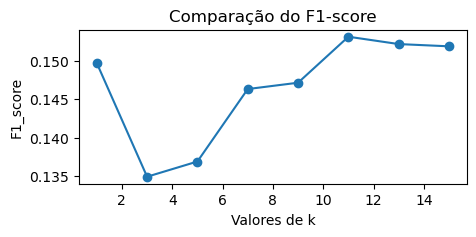

Número of features: 1
Melhor k: 11
F1_score: 0.14594967985948717


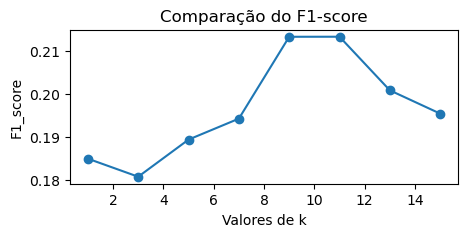

Número of features: 2
Melhor k: 11
F1_score: 0.20558517510758492


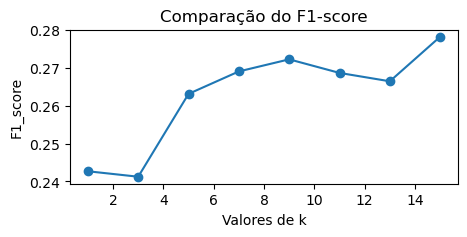

Número of features: 3
Melhor k: 15
F1_score: 0.32237675695100576


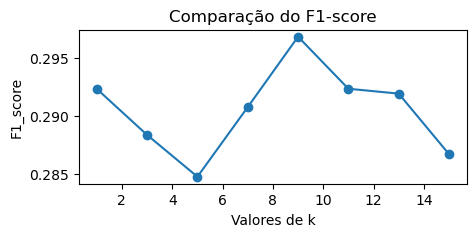

Número of features: 4
Melhor k: 9
F1_score: 0.33062759638262046


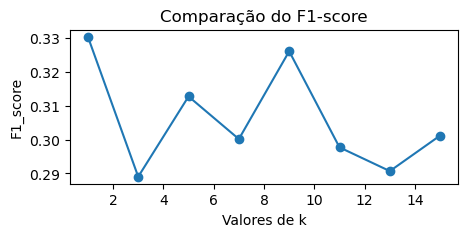

Número of features: 5
Melhor k: 1
F1_score: 0.34007285663096665


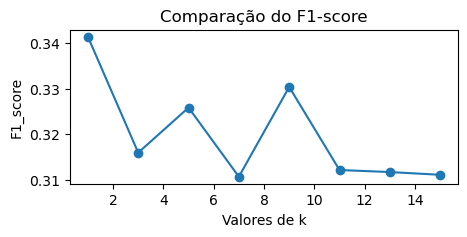

Número of features: 6
Melhor k: 1
F1_score: 0.3856668015718467


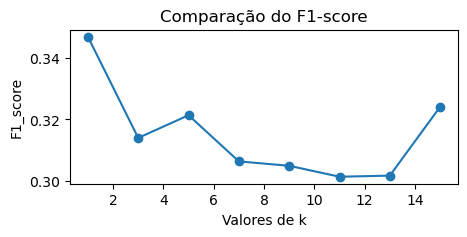

Número of features: 7
Melhor k: 1
F1_score: 0.38949172481993977


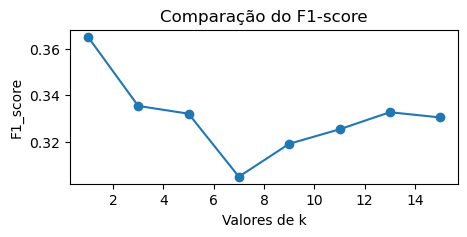

Número of features: 8
Melhor k: 1
F1_score: 0.4076231700630378


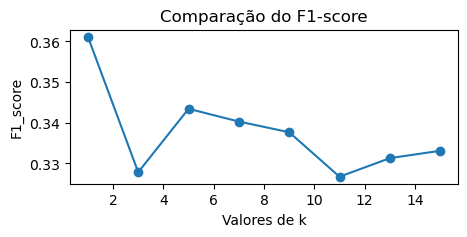

Número of features: 9
Melhor k: 1
F1_score: 0.40730973685362626


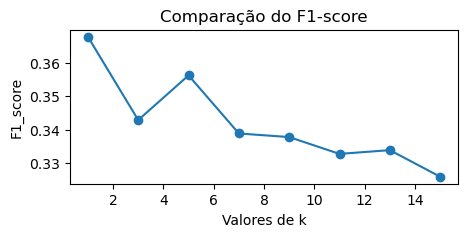

Número of features: 10
Melhor k: 1
F1_score: 0.41106038520413607


k=1       k=3       k=5       k=7       k=9  \
Número of features: 1   0.149684  0.134934  0.136907  0.146309  0.147130   
Número of features: 2   0.184996  0.180810  0.189426  0.194288  0.213289   
Número of features: 3   0.242679  0.241237  0.263118  0.269049  0.272240   
Número of features: 4   0.292356  0.288389  0.284789  0.290785  0.296848   
Número of features: 5   0.330299  0.289036  0.312693  0.300138  0.326015   
Número of features: 6   0.341372  0.315997  0.325856  0.310736  0.330379   
Número of features: 7   0.346968  0.313956  0.321363  0.306303  0.304868   
Número of features: 8   0.365080  0.335311  0.331970  0.304859  0.319017   
Número of features: 9   0.361175  0.327852  0.343445  0.340311  0.337681   
Número of features: 10  0.367758  0.342879  0.356221  0.338870  0.337799   

                            k=11      k=13      k=15  
Número of features: 1   0.153098  0.152144  0.151851  
Número of features: 2   0.213302  0.200860  0.195456  
Número of features: 3   0.268653  0.266442  0.278214  
Número of features: 4   0.292366  0.291946  0.286731  
Número of features: 5   0.297689  0.290692  0.301179  
Número of features: 6   0.312202  0.311758  0.311159  
Número of features: 7   0.301304  0.301660  0.324118  
Número of features: 8   0.325258  0.332607  0.330366  
Número of features: 9   0.326739  0.331307  0.333118  
Número of features: 10  0.332780  0.333896  0.325960

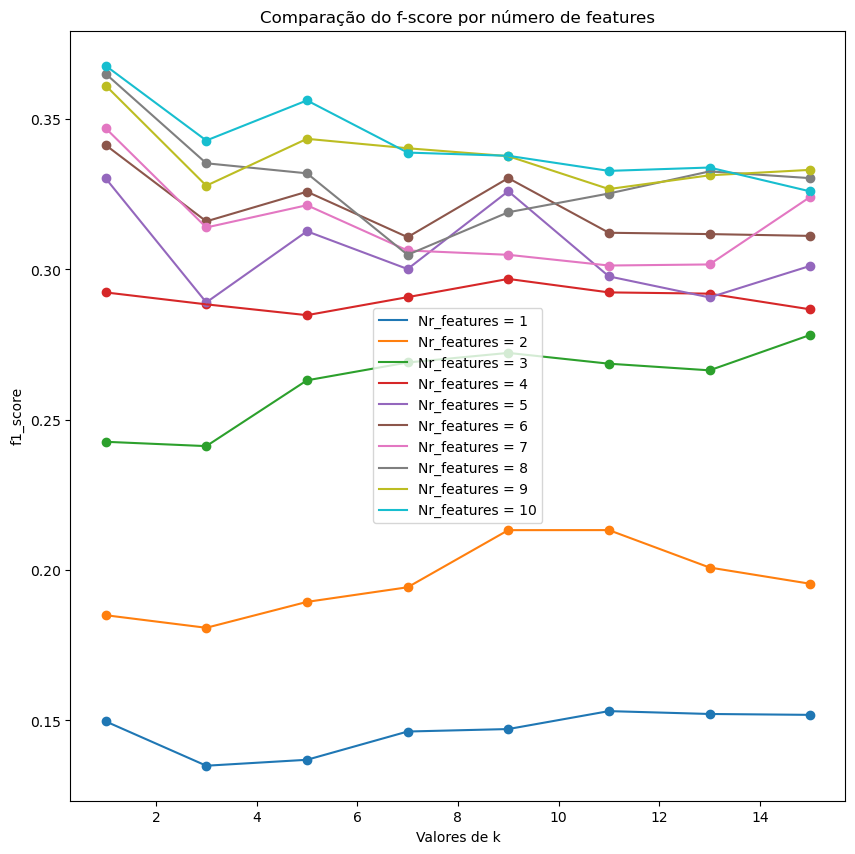

In [129]:
newActivity_elbow, df3, str_print = repeatTVT(feature_data,all_np, reliefF(feature_data, all_np), 10)

### 3.2. Gráfico do cotovelo

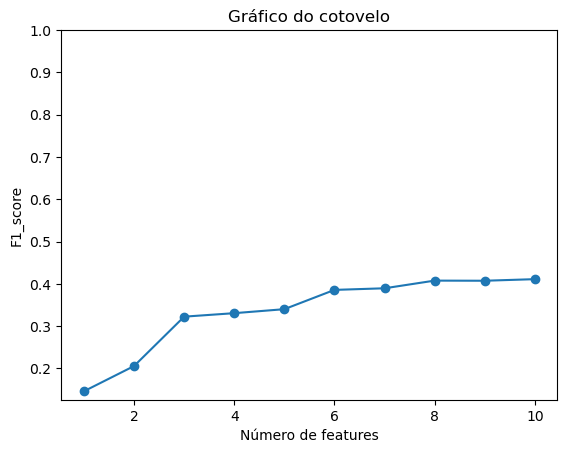

In [130]:
elbowGraph(newActivity_elbow, 11)

### 3.3. Resultados da validação

In [131]:
display(df3)

k=1       k=3       k=5       k=7       k=9  \
Número of features: 1   0.149684  0.134934  0.136907  0.146309  0.147130   
Número of features: 2   0.184996  0.180810  0.189426  0.194288  0.213289   
Número of features: 3   0.242679  0.241237  0.263118  0.269049  0.272240   
Número of features: 4   0.292356  0.288389  0.284789  0.290785  0.296848   
Número of features: 5   0.330299  0.289036  0.312693  0.300138  0.326015   
Número of features: 6   0.341372  0.315997  0.325856  0.310736  0.330379   
Número of features: 7   0.346968  0.313956  0.321363  0.306303  0.304868   
Número of features: 8   0.365080  0.335311  0.331970  0.304859  0.319017   
Número of features: 9   0.361175  0.327852  0.343445  0.340311  0.337681   
Número of features: 10  0.367758  0.342879  0.356221  0.338870  0.337799   

                            k=11      k=13      k=15  
Número of features: 1   0.153098  0.152144  0.151851  
Número of features: 2   0.213302  0.200860  0.195456  
Número of features: 3   0.268653  0.266442  0.278214  
Número of features: 4   0.292366  0.291946  0.286731  
Número of features: 5   0.297689  0.290692  0.301179  
Número of features: 6   0.312202  0.311758  0.311159  
Número of features: 7   0.301304  0.301660  0.324118  
Número of features: 8   0.325258  0.332607  0.330366  
Número of features: 9   0.326739  0.331307  0.333118  
Número of features: 10  0.332780  0.333896  0.325960

### 3.4. Resultados dos testes

In [132]:
print(str_print)

Número of features: 1
Melhor k: 11
F1_score: 0.14594967985948717
--------------------------------------------------
Número of features: 2
Melhor k: 11
F1_score: 0.20558517510758492
--------------------------------------------------
Número of features: 3
Melhor k: 15
F1_score: 0.32237675695100576
--------------------------------------------------
Número of features: 4
Melhor k: 9
F1_score: 0.33062759638262046
--------------------------------------------------
Número of features: 5
Melhor k: 1
F1_score: 0.34007285663096665
--------------------------------------------------
Número of features: 6
Melhor k: 1
F1_score: 0.3856668015718467
--------------------------------------------------
Número of features: 7
Melhor k: 1
F1_score: 0.38949172481993977
--------------------------------------------------
Número of features: 8
Melhor k: 1
F1_score: 0.4076231700630378
--------------------------------------------------
Número of features: 9
Melhor k: 1
F1_score: 0.40730973685362626
---------------

## 4. Neural net

In [133]:
from sklearn.neural_network import MLPClassifier

dataTVT = train_validation_test(feature_data, all_np, 0.4, 0.3)

def plot_f1_2(metr, neur_evol):
    plt.figure()

    plt.plot(neur_evol, metr, label="f1")
    plt.scatter(neur_evol, metr)
    
    plt.title("Evolução do f1-score")
    plt.xlabel("Número de neurónios")
    plt.ylabel("f1-score")
    plt.show()

### 4.1. Fixed learning speed

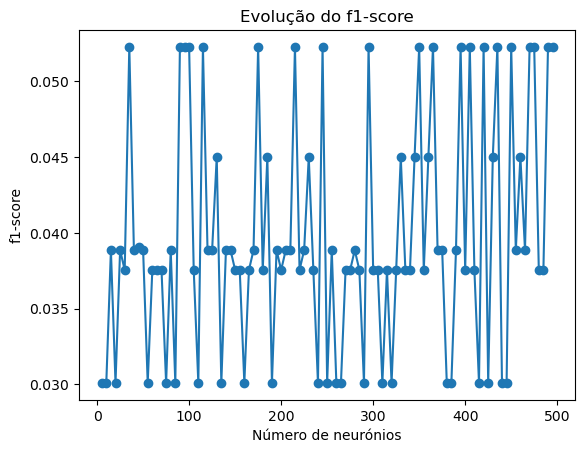

Best neurons number: 35


Metrics
Recall     0.157609
Precision  0.024841
F1-score   0.042917

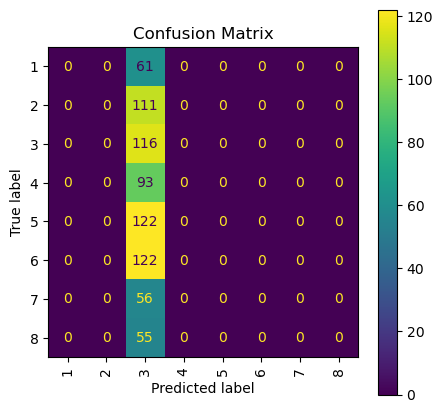

In [134]:
def mlp_4(type_speed):
    nns = []
    metrF1 = []

    neur_evol = np.arange(5, 500, 5)

    for i in neur_evol:
        if type_speed == 'fixed':
            clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        elif type_speed == 'variable':
            clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        else:
             clf = MLPClassifier(activation='logistic', hidden_layer_sizes=i, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)
        
        nns.append(clf.fit(dataTVT["TRAIN"][0], dataTVT["TRAIN"][1]))

        pred = clf.predict(dataTVT["VALIDATION"][0])

        true = dataTVT['VALIDATION'][1]
        
        cm, rs, ps, f1 = metrics(true, pred)

        metrF1.append(f1)

    plot_f1_2(metrF1, neur_evol)

    print("Best neurons number: " + str(neur_evol[np.argmax(metrF1)]))

    best_nns = np.argmax(metrF1)
    n_neur = neur_evol[best_nns]

    data_fin_x = np.concatenate((dataTVT["TRAIN"][0], dataTVT["VALIDATION"][0]))
    data_fin_y = np.concatenate((dataTVT["TRAIN"][1], dataTVT["VALIDATION"][1]))

    if type_speed == 'fixed':
        clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=n_neur, max_iter=2000)
    elif type_speed == 'variable':
        clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=n_neur, max_iter=2000)
    else:
        clf = MLPClassifier(activation='logistic', hidden_layer_sizes=n_neur, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)

    clf.fit(data_fin_x, data_fin_y)

    pred = clf.predict(dataTVT["TEST"][0])
    true = dataTVT['TEST'][1]
    cm, rs, ps, f1 = metrics(true, pred)
    display_matrix(cm, rs, ps, f1, emotions)

    return [cm, rs, ps, f1]

comp_41 = mlp_4('fixed')

### 4.2. Variable learning speed

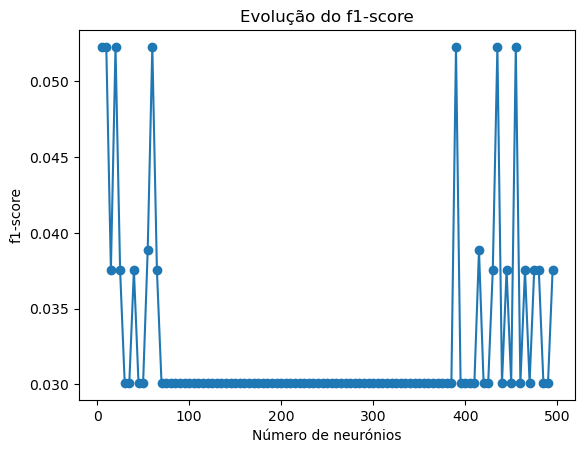

Best neurons number: 5


Metrics
Recall     0.150815
Precision  0.022745
F1-score   0.039529

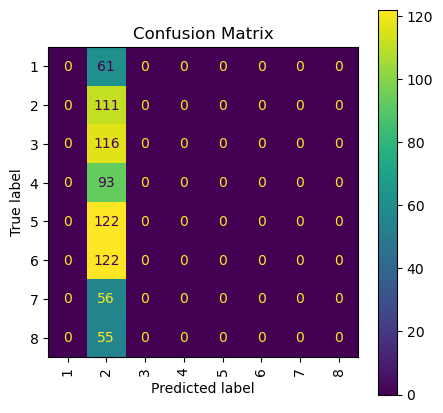

In [135]:
comp_42 = mlp_4('variable')

### 4.3. Momentum coeficient

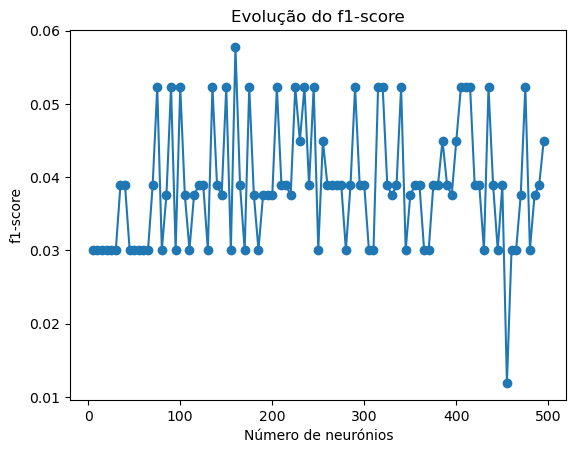

Best neurons number: 160


Metrics
Recall     0.165761
Precision  0.027477
F1-score   0.047139

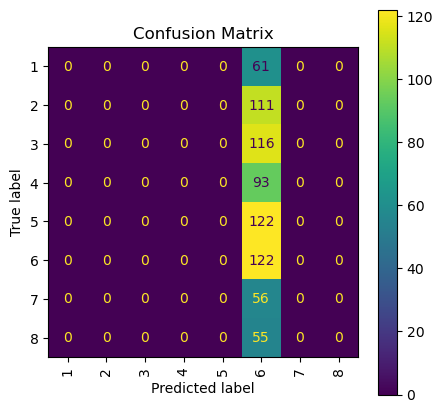

In [136]:
comp_43 = mlp_4('momentum')

### 4.4. Conclusões

Resultados do 3.1.2


Metrics
Recall     0.760870
Precision  0.762204
F1-score   0.759992

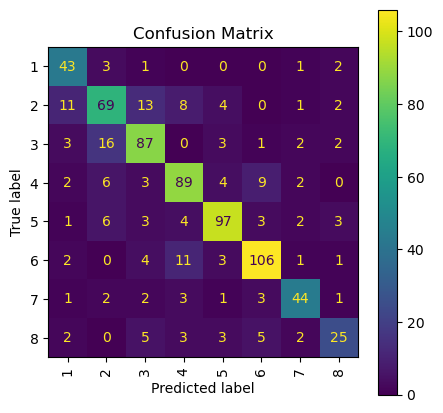


Resultados do 4.1


Metrics
Recall     0.157609
Precision  0.024841
F1-score   0.042917

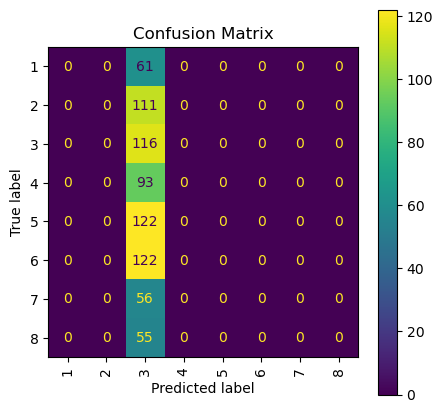


Resultados do 4.2


Metrics
Recall     0.150815
Precision  0.022745
F1-score   0.039529

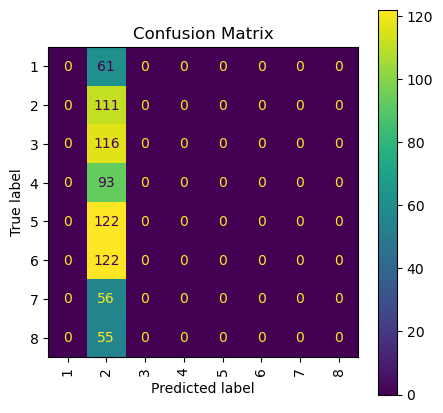


Resultados do 4.3


Metrics
Recall     0.165761
Precision  0.027477
F1-score   0.047139

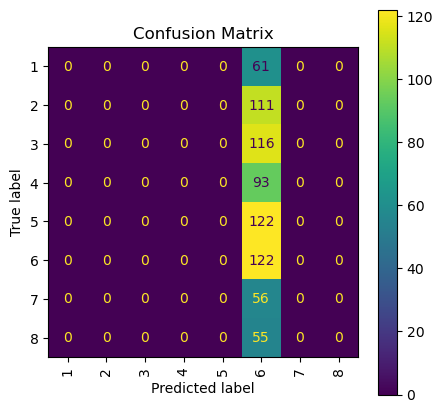

In [137]:
print("Resultados do 3.1.2")
display_matrix(comp_312[0], comp_312[1], comp_312[2], comp_312[3], emotions)

print("\nResultados do 4.1")
display_matrix(comp_41[0], comp_41[1], comp_41[2], comp_41[3], emotions)

print("\nResultados do 4.2")
display_matrix(comp_42[0], comp_42[1], comp_42[2], comp_42[3], emotions)

print("\nResultados do 4.3")
display_matrix(comp_43[0], comp_43[1], comp_43[2], comp_43[3], emotions)

Podemos observar que os resultados do 3.1.2 são melhores que os do exercicio 4 por isso podemos concluir que o uso de uma rede neuronal feedforward não é muito benéfico para o nosso dataset de features uma vez que os valores das métricas são bastantes baixas.